Housing_Internship_Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Loading the Dataset.

In [2]:
pd.set_option("display.max_rows", None)

In [3]:
Housing = pd.read_csv('train_housing.csv')

In [4]:
Housing_test = pd.read_csv('test_housing.csv')

In [6]:
Housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [7]:
Housing.shape

(1168, 81)

###### Test dataset

In [8]:
Housing_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  

[5 rows x 80 columns]

In [9]:
Housing_test.shape

(292, 80)

In [10]:
Housing.columns.difference(Housing_test.columns) #the column missing from test dataset

Index(['SalePrice'], dtype='object')

Dataset Description Provided

#### Problem Statement:
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. 

The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?

#### Business Goal:
To model the price of houses with the available independent variables. This model will then be used by the management to  understand how exactly the prices vary with the variables. They can accordingly manipulate the 
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the 
management to understand the pricing dynamics of a new market.

Data contains 1460 entries each having 81 variables.

MSSubClass: Identifies the type of dwelling involved in the sale.	

MSZoning: Identifies the general zoning classification of the sale.
		
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property
    
Alley: Type of alley access to property

LotShape: General shape of property
      
LandContour: Flatness of the property
		
Utilities: Type of utilities available
	
LotConfig: Lot configuration
	
LandSlope: Slope of property
	
Neighborhood: Physical locations within Ames city limits
			
Condition1: Proximity to various conditions
	
Condition2: Proximity to various conditions (if more than one is present)
	
BldgType: Type of dwelling
	
HouseStyle: Style of dwelling
	
OverallQual: Rates the overall material and finish of the house
	
OverallCond: Rates the overall condition of the house
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof
		
RoofMatl: Roof material
		
Exterior1st: Exterior covering on house
	
Exterior2nd: Exterior covering on house (if more than one material)
	
MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
ExterCond: Evaluates the present condition of the material on the exterior
		
Foundation: Type of foundation
		
BsmtQual: Evaluates the height of the basement
		
BsmtCond: Evaluates the general condition of the basement
	
BsmtExposure: Refers to walkout or garden level walls
	
BsmtFinType1: Rating of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
HeatingQC: Heating quality and condition
		
CentralAir: Central air conditioning

Electrical: Electrical system
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality
		
GarageType: Garage location
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality
		
GarageCond: Garage condition
		
PavedDrive: Paved driveway
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
Fence: Fence quality
	
MiscFeature: Miscellaneous feature not covered in other categories
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
SaleCondition: Condition of sale

#### Target Column: 

SalePrice


#### checking for null values

In [11]:
Housing[Housing.columns[Housing.isnull().any()]]

LotFrontage Alley MasVnrType  MasVnrArea BsmtQual BsmtCond BsmtExposure  \
0             NaN   NaN       None         0.0       Gd       TA           No   
1            95.0   NaN       None         0.0       TA       Gd           Gd   
2            92.0   NaN       None         0.0       Gd       TA           Av   
3           105.0   NaN    BrkFace       480.0       Gd       TA           No   
4             NaN   NaN      Stone       126.0       Gd       TA           No   
5            58.0   NaN       None         0.0       Gd       TA           Av   
6             NaN   NaN    BrkFace       180.0       Gd       TA           No   
7            88.0   NaN     BrkCmn        67.0       TA       TA           No   
8            70.0   NaN       None         0.0       TA       TA           No   
9            80.0   NaN       None         0.0       TA       TA           No   
10           50.0   NaN       None         0.0       TA       TA           No   
11           44.0   NaN    BrkFace       223.0       Gd       TA           No   
12          129.0   NaN       None         0.0       Ex       TA           No   
13           80.0   NaN     BrkCmn        66.0       TA       TA           No   
14           59.0   NaN       None         0.0       TA       TA           No   
15           55.0   NaN       None         0.0       TA       Fa           No   
16            NaN   NaN       None         0.0       TA       TA           Av   
17           64.0   NaN      Stone        82.0       Gd       TA           Av   
18            NaN   NaN    BrkFace       174.0       TA       Gd           No   
19           24.0   NaN    BrkFace       304.0       TA       TA           No   
20           80.0   NaN    BrkFace       172.0       Gd       TA           No   
21           70.0   NaN       None         0.0       Gd       TA           Av   
22           68.0   NaN       None         0.0       TA       TA           Mn   
23            NaN   NaN       None         0.0       TA       TA           No   
24           71.0   NaN    BrkFace       166.0       TA       TA           Mn   
25            NaN   NaN    BrkFace       184.0       Gd       TA           Mn   
26            NaN   NaN       None         0.0       TA       TA           No   
27           88.0   NaN      Stone       350.0       Ex       TA           Av   
28           58.0   NaN       None         0.0       TA       Fa           No   
29           74.0   NaN       None         0.0       TA       TA           No   
30           61.0   NaN    BrkFace       412.0       Ex       TA           No   
31           60.0  Grvl       None         0.0       TA       TA           No   
32            NaN   NaN       None         1.0       Gd       TA           No   
33            NaN   NaN       None         0.0       TA       TA           No   
34            NaN   NaN       None         0.0      NaN      NaN          NaN   
35          120.0   NaN       None         0.0       TA       TA           Av   
36           80.0   NaN    BrkFace       189.0       Gd       TA           No   
37           84.0   NaN       None         0.0       TA       Gd           Av   
38            NaN   NaN       None         0.0       Gd       TA           Av   
39           50.0   NaN       None         0.0       TA       TA           No   
40          141.0   NaN      Stone       112.0       TA       Gd           Gd   
41           70.0   NaN       None         0.0       Gd       TA           No   
42           30.0  Pave       None         0.0       Gd       TA           No   
43           24.0   NaN      Stone        50.0       Gd       TA           No   
44           65.0   NaN    BrkFace       220.0       Gd       Gd           Av   
45           76.0   NaN       None         0.0       TA       TA           Gd   
46           60.0   NaN    BrkFace        16.0       Gd       TA           No   
47          100.0   NaN       None         0.0       TA       TA           No   
48           50.0   NaN       None   

There are 18 columns in train dataframe with null values.


In [13]:
Housing.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

Clearly there are null values from the above result

In [14]:
Housing_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

#### Checking for blank spaces, random characters in each column

In [18]:
search =[" ","?","-"," ?"," -","? ","- "," ? "," - ","NA","N/A"," NA"," N/A",'na','n/a']

for i in Housing:
    for j in search:
        print(f"{j} in {i} = ",end= " ")
        print((Housing[i] == j).sum())

  in Id =  0
? in Id =  0
- in Id =  0
 ? in Id =  0
 - in Id =  0
?  in Id =  0
-  in Id =  0
 ?  in Id =  0
 -  in Id =  0
NA in Id =  0
N/A in Id =  0
 NA in Id =  0
 N/A in Id =  0
na in Id =  0
n/a in Id =  0
  in MSSubClass =  0
? in MSSubClass =  0
- in MSSubClass =  0
 ? in MSSubClass =  0
 - in MSSubClass =  0
?  in MSSubClass =  0
-  in MSSubClass =  0
 ?  in MSSubClass =  0
 -  in MSSubClass =  0
NA in MSSubClass =  0
N/A in MSSubClass =  0
 NA in MSSubClass =  0
 N/A in MSSubClass =  0
na in MSSubClass =  0
n/a in MSSubClass =  0
  in MSZoning =  0
? in MSZoning =  0
- in MSZoning =  0
 ? in MSZoning =  0
 - in MSZoning =  0
?  in MSZoning =  0
-  in MSZoning =  0
 ?  in MSZoning =  0
 -  in MSZoning =  0
NA in MSZoning =  0
N/A in MSZoning =  0
 NA in MSZoning =  0
 N/A in MSZoning =  0
na in MSZoning =  0
n/a in MSZoning =  0
  in LotFrontage =  0
? in LotFrontage =  0
- in LotFrontage =  0
 ? in LotFrontage =  0
 - in LotFrontage =  0
?  in LotFrontage =  0
-  in LotFron

There are no blank spaces, random characters  in columns of train dataset

In [19]:
search =[" ","?","-"," ?"," -","? ","- "," ? "," - ","NA","N/A"," NA"," N/A",'na','n/a']

for i in Housing_test:
    for j in search:
        print(f"{j} in {i} = ",end= " ")
        print((Housing_test[i] == j).sum())

  in Id =  0
? in Id =  0
- in Id =  0
 ? in Id =  0
 - in Id =  0
?  in Id =  0
-  in Id =  0
 ?  in Id =  0
 -  in Id =  0
NA in Id =  0
N/A in Id =  0
 NA in Id =  0
 N/A in Id =  0
na in Id =  0
n/a in Id =  0
  in MSSubClass =  0
? in MSSubClass =  0
- in MSSubClass =  0
 ? in MSSubClass =  0
 - in MSSubClass =  0
?  in MSSubClass =  0
-  in MSSubClass =  0
 ?  in MSSubClass =  0
 -  in MSSubClass =  0
NA in MSSubClass =  0
N/A in MSSubClass =  0
 NA in MSSubClass =  0
 N/A in MSSubClass =  0
na in MSSubClass =  0
n/a in MSSubClass =  0
  in MSZoning =  0
? in MSZoning =  0
- in MSZoning =  0
 ? in MSZoning =  0
 - in MSZoning =  0
?  in MSZoning =  0
-  in MSZoning =  0
 ?  in MSZoning =  0
 -  in MSZoning =  0
NA in MSZoning =  0
N/A in MSZoning =  0
 NA in MSZoning =  0
 N/A in MSZoning =  0
na in MSZoning =  0
n/a in MSZoning =  0
  in LotFrontage =  0
? in LotFrontage =  0
- in LotFrontage =  0
 ? in LotFrontage =  0
 - in LotFrontage =  0
?  in LotFrontage =  0
-  in LotFron

There are no blank spaces, random characters  in columns of test dataset

<AxesSubplot:>

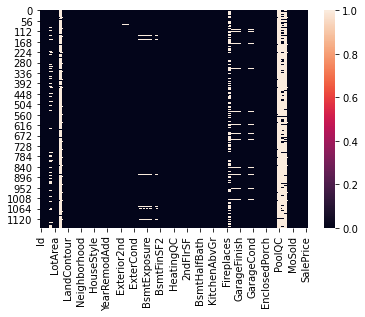

In [20]:
sns.heatmap(Housing.isnull()) #visualising null values in train dataset

Columns titled: Alley, PoolQC,MiscFeature,FireplaceQu,Fence have extremely sparse data with overwhelmingly high percentage of null values and therefore must be dropped.

<AxesSubplot:>

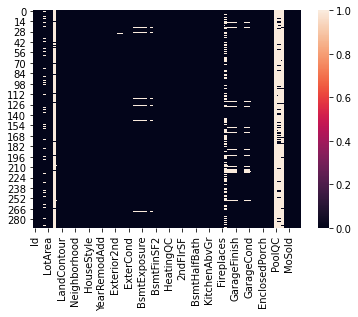

In [21]:
sns.heatmap(Housing_test.isnull()) #visualising null values in test dataset

Columns titled: Alley, PoolQC,MiscFeature,FireplaceQu,Fence have extremely sparse data with overwhelmingly high percentage of null values and therefore must be dropped.

In [22]:
Housing.drop(columns=['Alley','PoolQC','MiscFeature','FireplaceQu','Fence'],inplace=True)

In [23]:
Housing_test.drop(columns=['Alley','PoolQC','MiscFeature','FireplaceQu','Fence'],inplace=True)

In [24]:
Housing.shape

(1168, 76)

In [25]:
Housing_test.shape

(292, 75)

Dropping the ID columns from test and train datasets, since they do not add much value and are meaningless

In [26]:
Housing.drop(columns=['Id'],inplace=True)

In [27]:
Housing_test.drop(columns=['Id'],inplace=True)

In [28]:
Housing.dtypes[Housing.dtypes == 'object'] #Identifying the Categorical Columns

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [30]:
Housing.dtypes[Housing.dtypes != 'object'] #Identifying the non-object type Columns

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [31]:
Housing[Housing.columns[Housing.isnull().any()]].shape

(1168, 13)

In [32]:
Housing_test[Housing_test.columns[Housing_test.isnull().any()]].shape

(292, 14)

Finding the null value percentage in each of the columns in train dataset

In [34]:
for i in Housing[Housing.columns[Housing.isnull().any()]]:
    perctange = Housing[i].isnull().sum()/1168*100
    print(f"null value % in {c} is: {perctange}")

null value % in SalePrice is: 18.32191780821918
null value % in SalePrice is: 0.5993150684931506
null value % in SalePrice is: 0.5993150684931506
null value % in SalePrice is: 2.5684931506849313
null value % in SalePrice is: 2.5684931506849313
null value % in SalePrice is: 2.654109589041096
null value % in SalePrice is: 2.5684931506849313
null value % in SalePrice is: 2.654109589041096
null value % in SalePrice is: 5.47945205479452
null value % in SalePrice is: 5.47945205479452
null value % in SalePrice is: 5.47945205479452
null value % in SalePrice is: 5.47945205479452
null value % in SalePrice is: 5.47945205479452


Finding the null value percentage in each of the columns in test dataset

In [35]:
for j in Housing_test[Housing_test.columns[Housing_test.isnull().any()]]:
    percentage = Housing_test[j].isnull().sum()/292*100
    print(f"null value % in {j} is: {percentage}")

null value % in LotFrontage is: 15.41095890410959
null value % in MasVnrType is: 0.3424657534246575
null value % in MasVnrArea is: 0.3424657534246575
null value % in BsmtQual is: 2.3972602739726026
null value % in BsmtCond is: 2.3972602739726026
null value % in BsmtExposure is: 2.3972602739726026
null value % in BsmtFinType1 is: 2.3972602739726026
null value % in BsmtFinType2 is: 2.3972602739726026
null value % in Electrical is: 0.3424657534246575
null value % in GarageType is: 5.821917808219178
null value % in GarageYrBlt is: 5.821917808219178
null value % in GarageFinish is: 5.821917808219178
null value % in GarageQual is: 5.821917808219178
null value % in GarageCond is: 5.821917808219178


In [36]:
Housing[Housing.columns[Housing.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   954 non-null    float64
 1   MasVnrType    1161 non-null   object 
 2   MasVnrArea    1161 non-null   float64
 3   BsmtQual      1138 non-null   object 
 4   BsmtCond      1138 non-null   object 
 5   BsmtExposure  1137 non-null   object 
 6   BsmtFinType1  1138 non-null   object 
 7   BsmtFinType2  1137 non-null   object 
 8   GarageType    1104 non-null   object 
 9   GarageYrBlt   1104 non-null   float64
 10  GarageFinish  1104 non-null   object 
 11  GarageQual    1104 non-null   object 
 12  GarageCond    1104 non-null   object 
dtypes: float64(3), object(10)
memory usage: 118.8+ KB


Majority of the columns witll null values is of object datatype

In [37]:
Housing_test[Housing_test.columns[Housing_test.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   247 non-null    float64
 1   MasVnrType    291 non-null    object 
 2   MasVnrArea    291 non-null    float64
 3   BsmtQual      285 non-null    object 
 4   BsmtCond      285 non-null    object 
 5   BsmtExposure  285 non-null    object 
 6   BsmtFinType1  285 non-null    object 
 7   BsmtFinType2  285 non-null    object 
 8   Electrical    291 non-null    object 
 9   GarageType    275 non-null    object 
 10  GarageYrBlt   275 non-null    float64
 11  GarageFinish  275 non-null    object 
 12  GarageQual    275 non-null    object 
 13  GarageCond    275 non-null    object 
dtypes: float64(3), object(11)
memory usage: 32.1+ KB


Majority of the columns witll null values is of object datatype

In [38]:
Housing['LotFrontage'].mode()

0    60.0
dtype: float64

In [39]:
(Housing['MasVnrArea']==0.0).sum()/Housing['MasVnrArea'].count()*100 #checking the % share of most frequently occuring value.

59.60378983634798

In [40]:
(Housing['MasVnrType']=='None').value_counts()

True     696
False    472
Name: MasVnrType, dtype: int64

Using KNN Imputation technique for imputing missing data in LotFrontage .

In [41]:
from sklearn.impute import KNNImputer

In [42]:
imp = KNNImputer(n_neighbors=2)

In [44]:
Housing[['LotFrontage']] = imp.fit_transform(Housing[['LotFrontage']])

In [45]:
Housing[['LotFrontage']].isnull().sum()

LotFrontage    0
dtype: int64

There are no more null values in LotFrontage column

In [47]:
(Housing['MasVnrArea']==0.0).sum()/Housing['MasVnrArea'].count()*100 #checking the % share of most frequently occuring value.

59.60378983634798

Imputing The mose frequently occuring values to NaN values in each of the columns

In [48]:
from sklearn.impute import SimpleImputer

In [49]:
si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent',verbose = 0 )

In [51]:
si = si.fit(Housing[['MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']])

In [53]:
Housing[['MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']] = si.transform(Housing[['MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']])

In [54]:
Housing.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

There are no more null values present.

Using KNN Imputation technique for imputing missing data in LotFrontage in test dataset .

In [55]:
from sklearn.impute import KNNImputer

In [56]:
imp = KNNImputer(n_neighbors=2)

In [47]:
Housing_test[['LotFrontage']] = imp.fit_transform(HDF_test[['LotFrontage']])

In [57]:
Housing_test[['LotFrontage']].isnull().sum()

LotFrontage    45
dtype: int64

There are no more null values in LotFrontage column

Imputing The mose frequently occuring values to NaN values in each of the columns in test dataset

In [58]:
from sklearn.impute import SimpleImputer

In [59]:
si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent',verbose = 0 )

In [60]:
si = si.fit(Housing_test[['MasVnrType','Electrical','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']])

In [63]:
Housing_test[['MasVnrType','Electrical','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']] = si.transform(Housing_test[['MasVnrType','Electrical','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']])

In [64]:
Housing_test.isnull().sum()

MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0


There are no more null values present.

In [65]:
Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   LotShape       1168 non-null   object 
 6   LandContour    1168 non-null   object 
 7   Utilities      1168 non-null   object 
 8   LotConfig      1168 non-null   object 
 9   LandSlope      1168 non-null   object 
 10  Neighborhood   1168 non-null   object 
 11  Condition1     1168 non-null   object 
 12  Condition2     1168 non-null   object 
 13  BldgType       1168 non-null   object 
 14  HouseStyle     1168 non-null   object 
 15  OverallQual    1168 non-null   int64  
 16  OverallCond    1168 non-null   int64  
 17  YearBuilt      1168 non-null   int64  
 18  YearRemo

In [66]:
Housing.dtypes[Housing.dtypes == 'object'] #Identifying the object type Columns

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [67]:
Housing.dtypes[Housing.dtypes != 'object'] #Identifying the non object type Columns

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [68]:
Housing.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     56.767979    70.988470   10484.749144     6.104452     5.595890   
std      41.940650    22.437056    8957.442311     1.390153     1.124343   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7621.500000     5.000000     5.000000   
50%      50.000000    70.988470    9522.500000     6.000000     5.000000   
75%      70.000000    79.250000   11515.500000     7.000000     6.000000   
max     190.000000   313.000000  164660.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1168.000000   1168.000000  1168.000000  1168.000000  1168.000000  ...   
mean   1970.930651   1984.758562   101.696918   444.726027    46.647260  ...   
std      30.145255     20.785185   182.218483   462.664785   163.520016  ...   
min    1875.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1966.000000     0.000000     0.000000     0.000000  ...   
50%    1972.000000   1993.000000     0.000000   385.500000     0.000000  ...   
75%    2000.000000   2004.000000   160.000000   714.500000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     96.206336    46.559932      23.015411     3.639555    15.051370   
std     126.158988    66.381023      63.191089    29.088867    55.080816   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     171.000000    70.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      3.448630     47.315068     6.344178  2007.804795  181477.005993  
std      44.896939    543.264432     2.686352     1.329738   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

 Relationship between Independent  and Dependent Variables

 Analyzing the continuous data type Target column

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

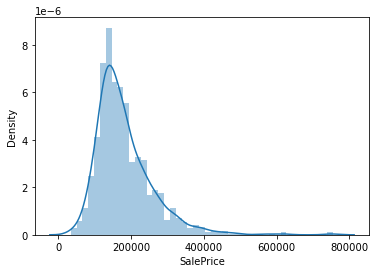

In [69]:
sns.distplot(Housing.SalePrice)

From the graph above it is observed that the Price data forms a continuous distribution with mean of 181477.00 and tails off from 400000 mark.

In [70]:
Housing.SalePrice.skew()

1.953877705368286

Distribution is skewed

<AxesSubplot:xlabel='SalePrice'>

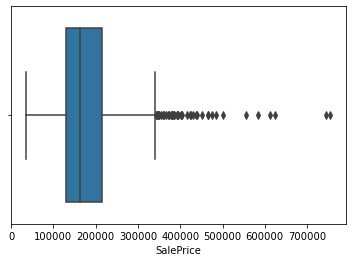

In [71]:
sns.boxplot(Housing.SalePrice)

There are outliers present in the data column

#### Analyzing the Feature Columns

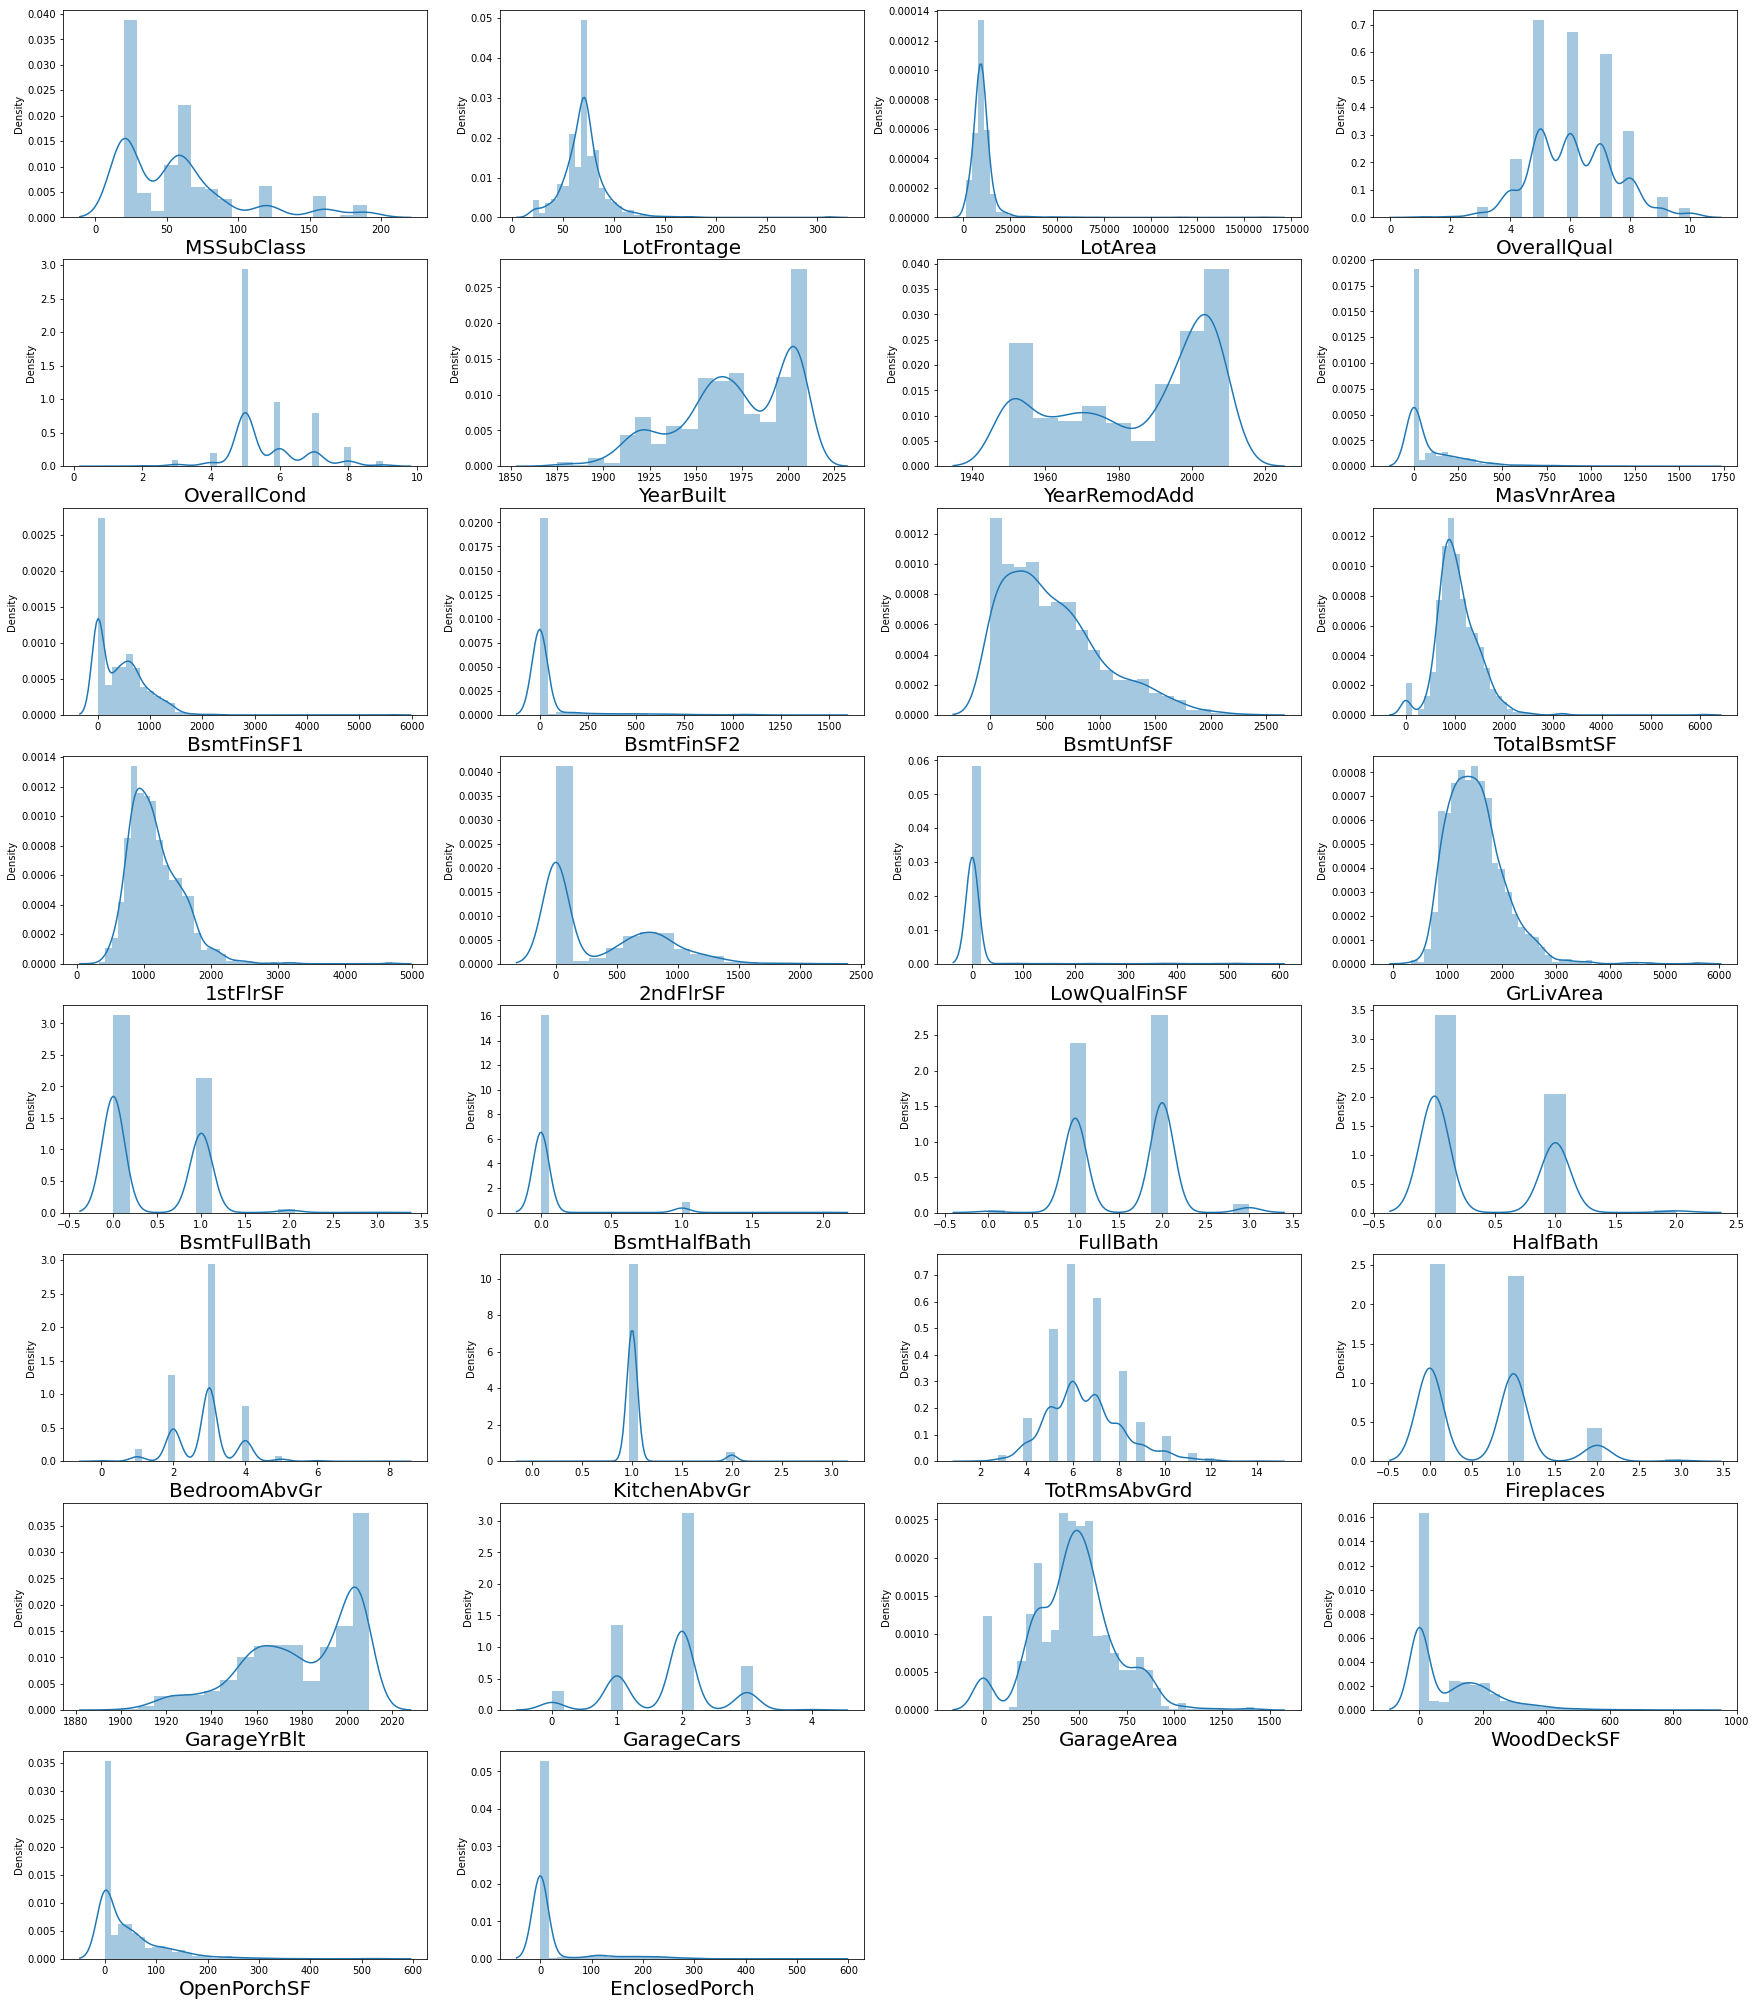

In [73]:
plt.figure(figsize=(30,45),facecolor='white')
plotnum=1
for col in Housing[Housing.columns[Housing.dtypes != 'object']]:
    if plotnum<=30:
        plt.subplot(10,4,plotnum)
        sns.distplot(Housing[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnFSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,WoodDeckSF,OpenPorchSF,EnclosedPorch are skewed and contain outliers

In [74]:
Housing[Housing.columns[Housing.dtypes != 'object']].skew()

MSSubClass        1.422019
LotFrontage       2.710383
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        2.835718
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageYrBlt      -0.708074
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
SalePrice         1.953878
d

 skewness exists in columns

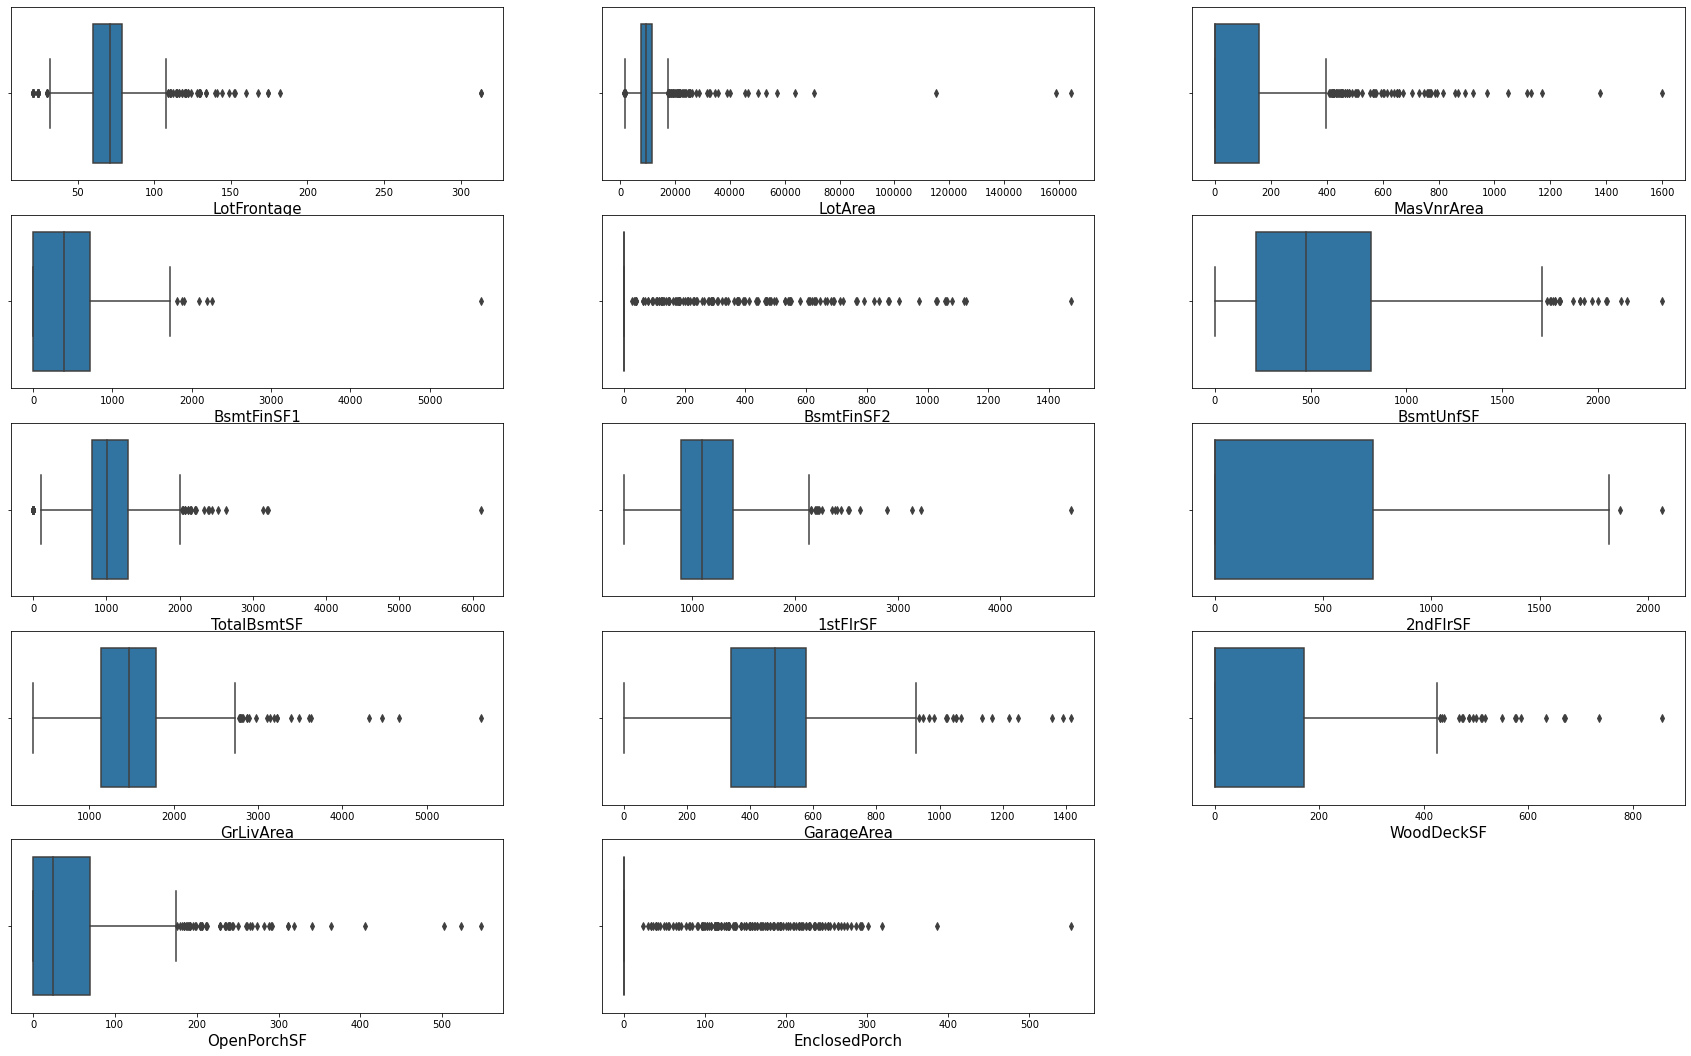

In [75]:
plt.figure(figsize=(30,30),facecolor='white')
plotnum=1
for col in Housing[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch']]:
    if plotnum<=20:
        plt.subplot(8,3,plotnum)
        sns.boxplot(Housing[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()

There are considerable outliers in the columns.

Checking for Skewness in Data

In [76]:
Housing[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch']].skew()

LotFrontage       2.710383
LotArea          10.659285
MasVnrArea        2.835718
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
GrLivArea         1.449952
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
dtype: float64

There is considerable skewness in the columns

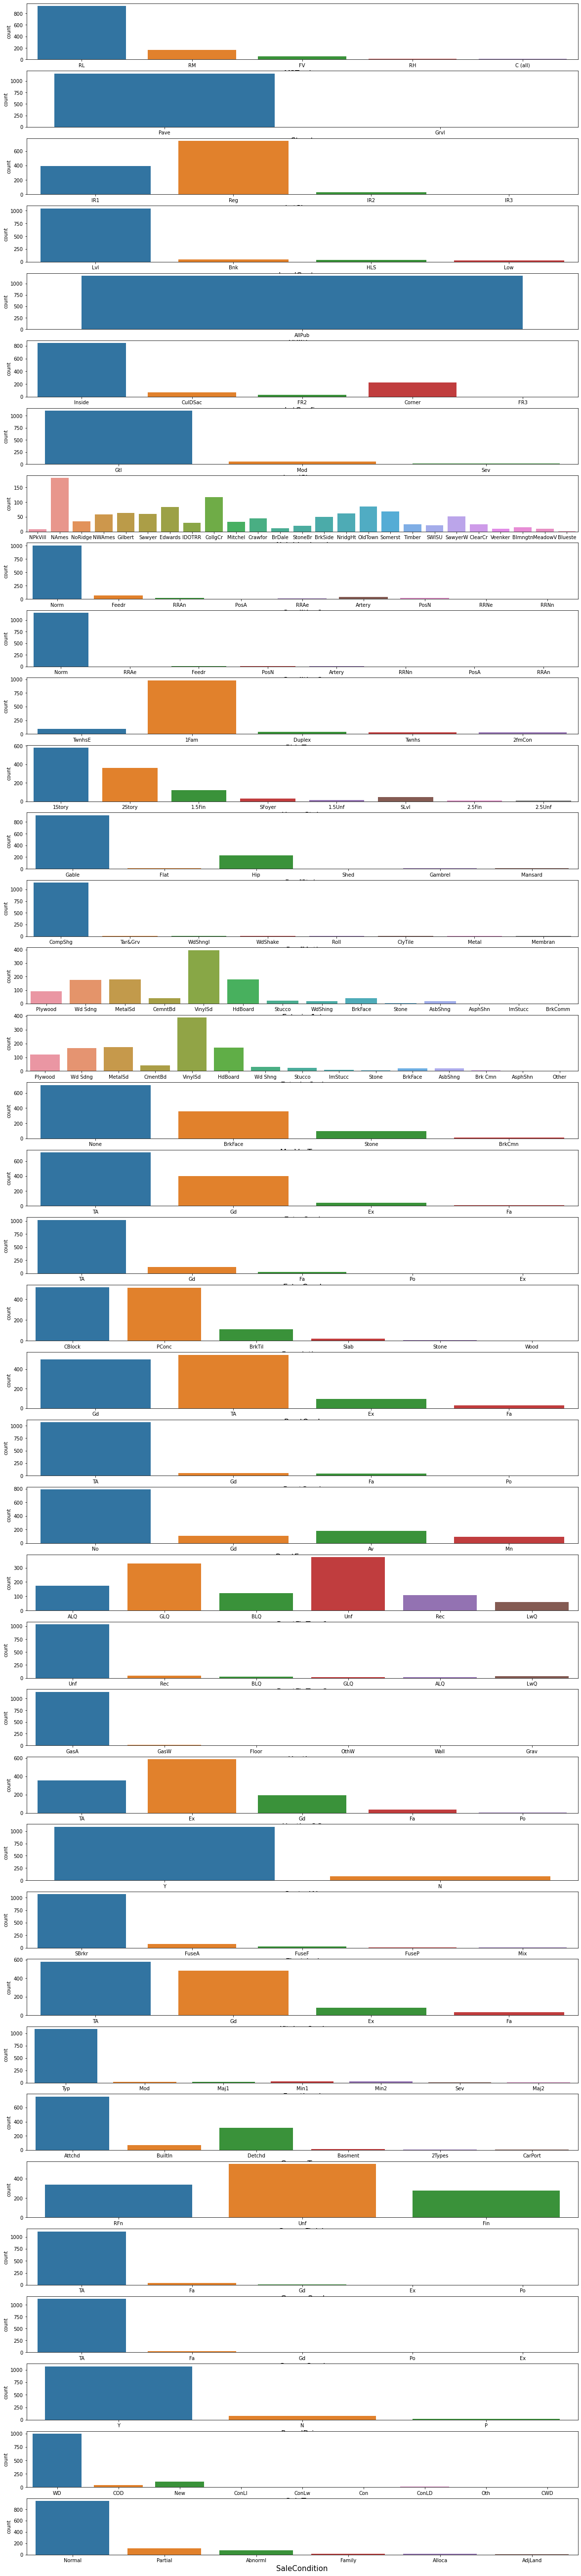

In [78]:
plt.figure(figsize=(20,100))
plotnum=1
for col in Housing[Housing.columns[Housing.dtypes == 'object']]:
    if plotnum<=40:
        plt.subplot(40,1,plotnum)
        sns.countplot(Housing[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()

Observation made from above:
Residential Low Density is the most common zoing classification

Most common Street Type is 'Pave'

Regular is the most common LotShape, followed by Slightly irregular

Most Properties have Near Flat/Level LandContour

Interpreting Relationship between Dependent Variable and Independent Variable Columns

Text(0.5, 1.0, 'Price Trend')

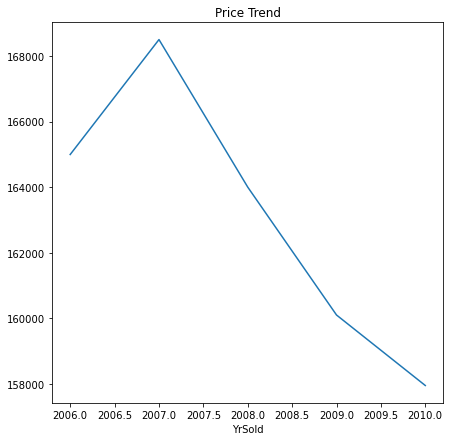

In [79]:
plt.figure(figsize=(7,7))
Housing.groupby('YrSold').median()['SalePrice'].plot()
plt.title('Price Trend')

From the graph above, it is observed that Sales value peaked between 2006 and 2007 and there has been a general downward trend in sales price since then

Text(0.5, 1.0, 'Price Trend')

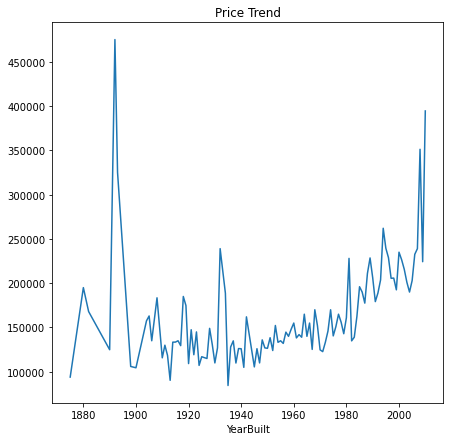

In [80]:
plt.figure(figsize=(7,7))
Housing.groupby('YearBuilt').median()['SalePrice'].plot()
plt.title('Price Trend')

From the graph above, it is observed that Sales value is higher for houses built after 1990s implying the lesser the age of the house, the higher its value, however houses built between 1880 and 1900 sold for the highest, this could be because of their antiquity value.

Text(0.5, 1.0, 'Price Trend')

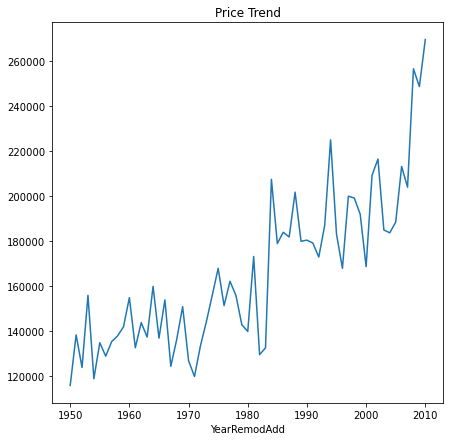

In [81]:
plt.figure(figsize=(7,7))
Housing.groupby('YearRemodAdd').median()['SalePrice'].plot()
plt.title('Price Trend')

From the graph above, it is observed that Sales value is higher for houses which were remodelled more recently.

Text(0.5, 1.0, 'Price Trend')

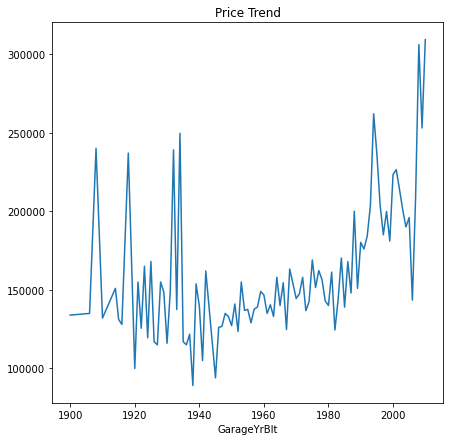

In [82]:
plt.figure(figsize=(7,7))
Housing.groupby('GarageYrBlt').median()['SalePrice'].plot()
plt.title('Price Trend')

From the graph above, it is observed that Sales value is higher for houses whose Garage was built more recently.

 Extracting the age of House from YearBuilt will give a better insight into its relationship with target column data.

In [83]:
Housing['House_Age'] = Housing['YearBuilt'].apply(lambda y: 2021 - y) 

Extracting the age of Remodeled  House from YearRemodAdd will give a better insight into its relationship with target column data.

In [84]:
Housing['Remod_Age'] = Housing['YearRemodAdd'].apply(lambda y: 2021 - y) 

 Extracting the age of Garage of the House from GarageYrBlt will give a better insight into its relationship with target column data.

In [85]:
Housing['Garage_age'] = Housing['GarageYrBlt'].apply(lambda y: 2021 - y) 

In [86]:
Housing.drop(columns = ['YearBuilt','YearRemodAdd','GarageYrBlt'],inplace = True) #dropping the 'YearBuilt','YearRemodAdd','GarageYrBlt' columns since they are no longer needed

In [87]:
Housing_test['House_Age'] = Housing_test['YearBuilt'].apply(lambda y: 2021 - y) 
Housing_test['Remod_Age'] = Housing_test['YearRemodAdd'].apply(lambda y: 2021 - y) 
Housing_test['Garage_age'] = Housing_test['GarageYrBlt'].apply(lambda y: 2021 - y) 
Housing_test.drop(columns = ['YearBuilt','YearRemodAdd','GarageYrBlt'],inplace = True) #dropping the 'YearBuilt','YearRemodAdd','GarageYrBlt' columns since they are no longer needed

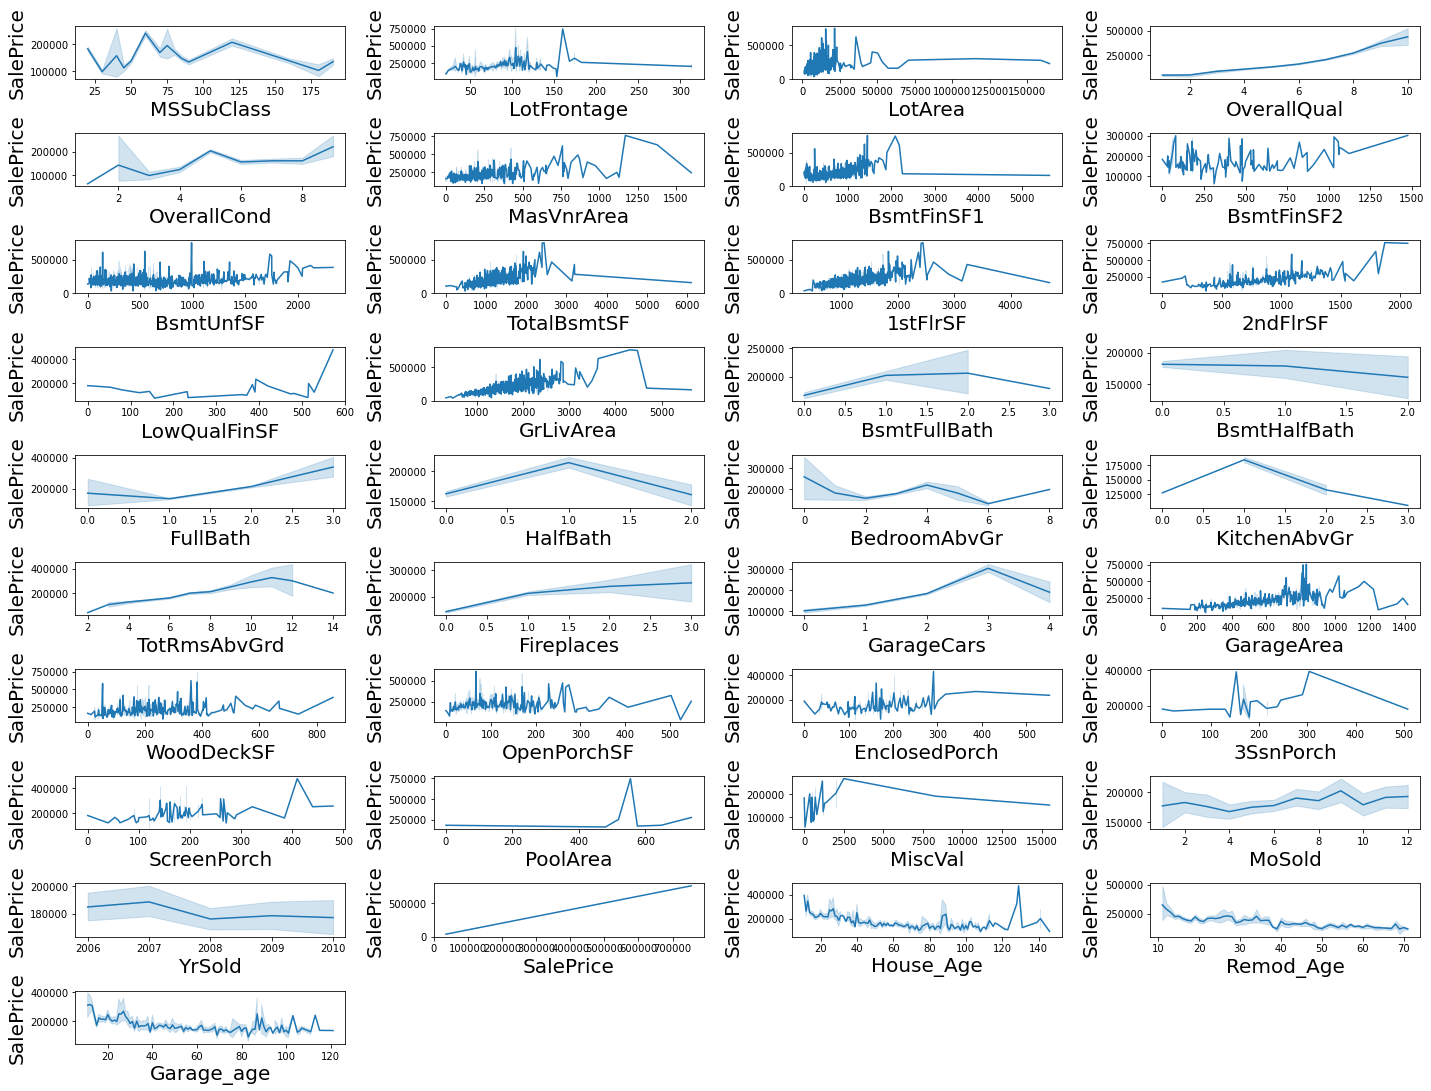

In [90]:
plt.figure(figsize=(20,15))
plotnum=1
y = Housing['SalePrice']
Housing.drop(columns=['SalePrice'])
for col in Housing[Housing.columns[Housing.dtypes != 'object']]:
    if plotnum<=40:
        plt.subplot(10,4,plotnum)
        sns.lineplot(Housing[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('SalePrice',fontsize=20)
    plotnum+=1
plt.tight_layout()

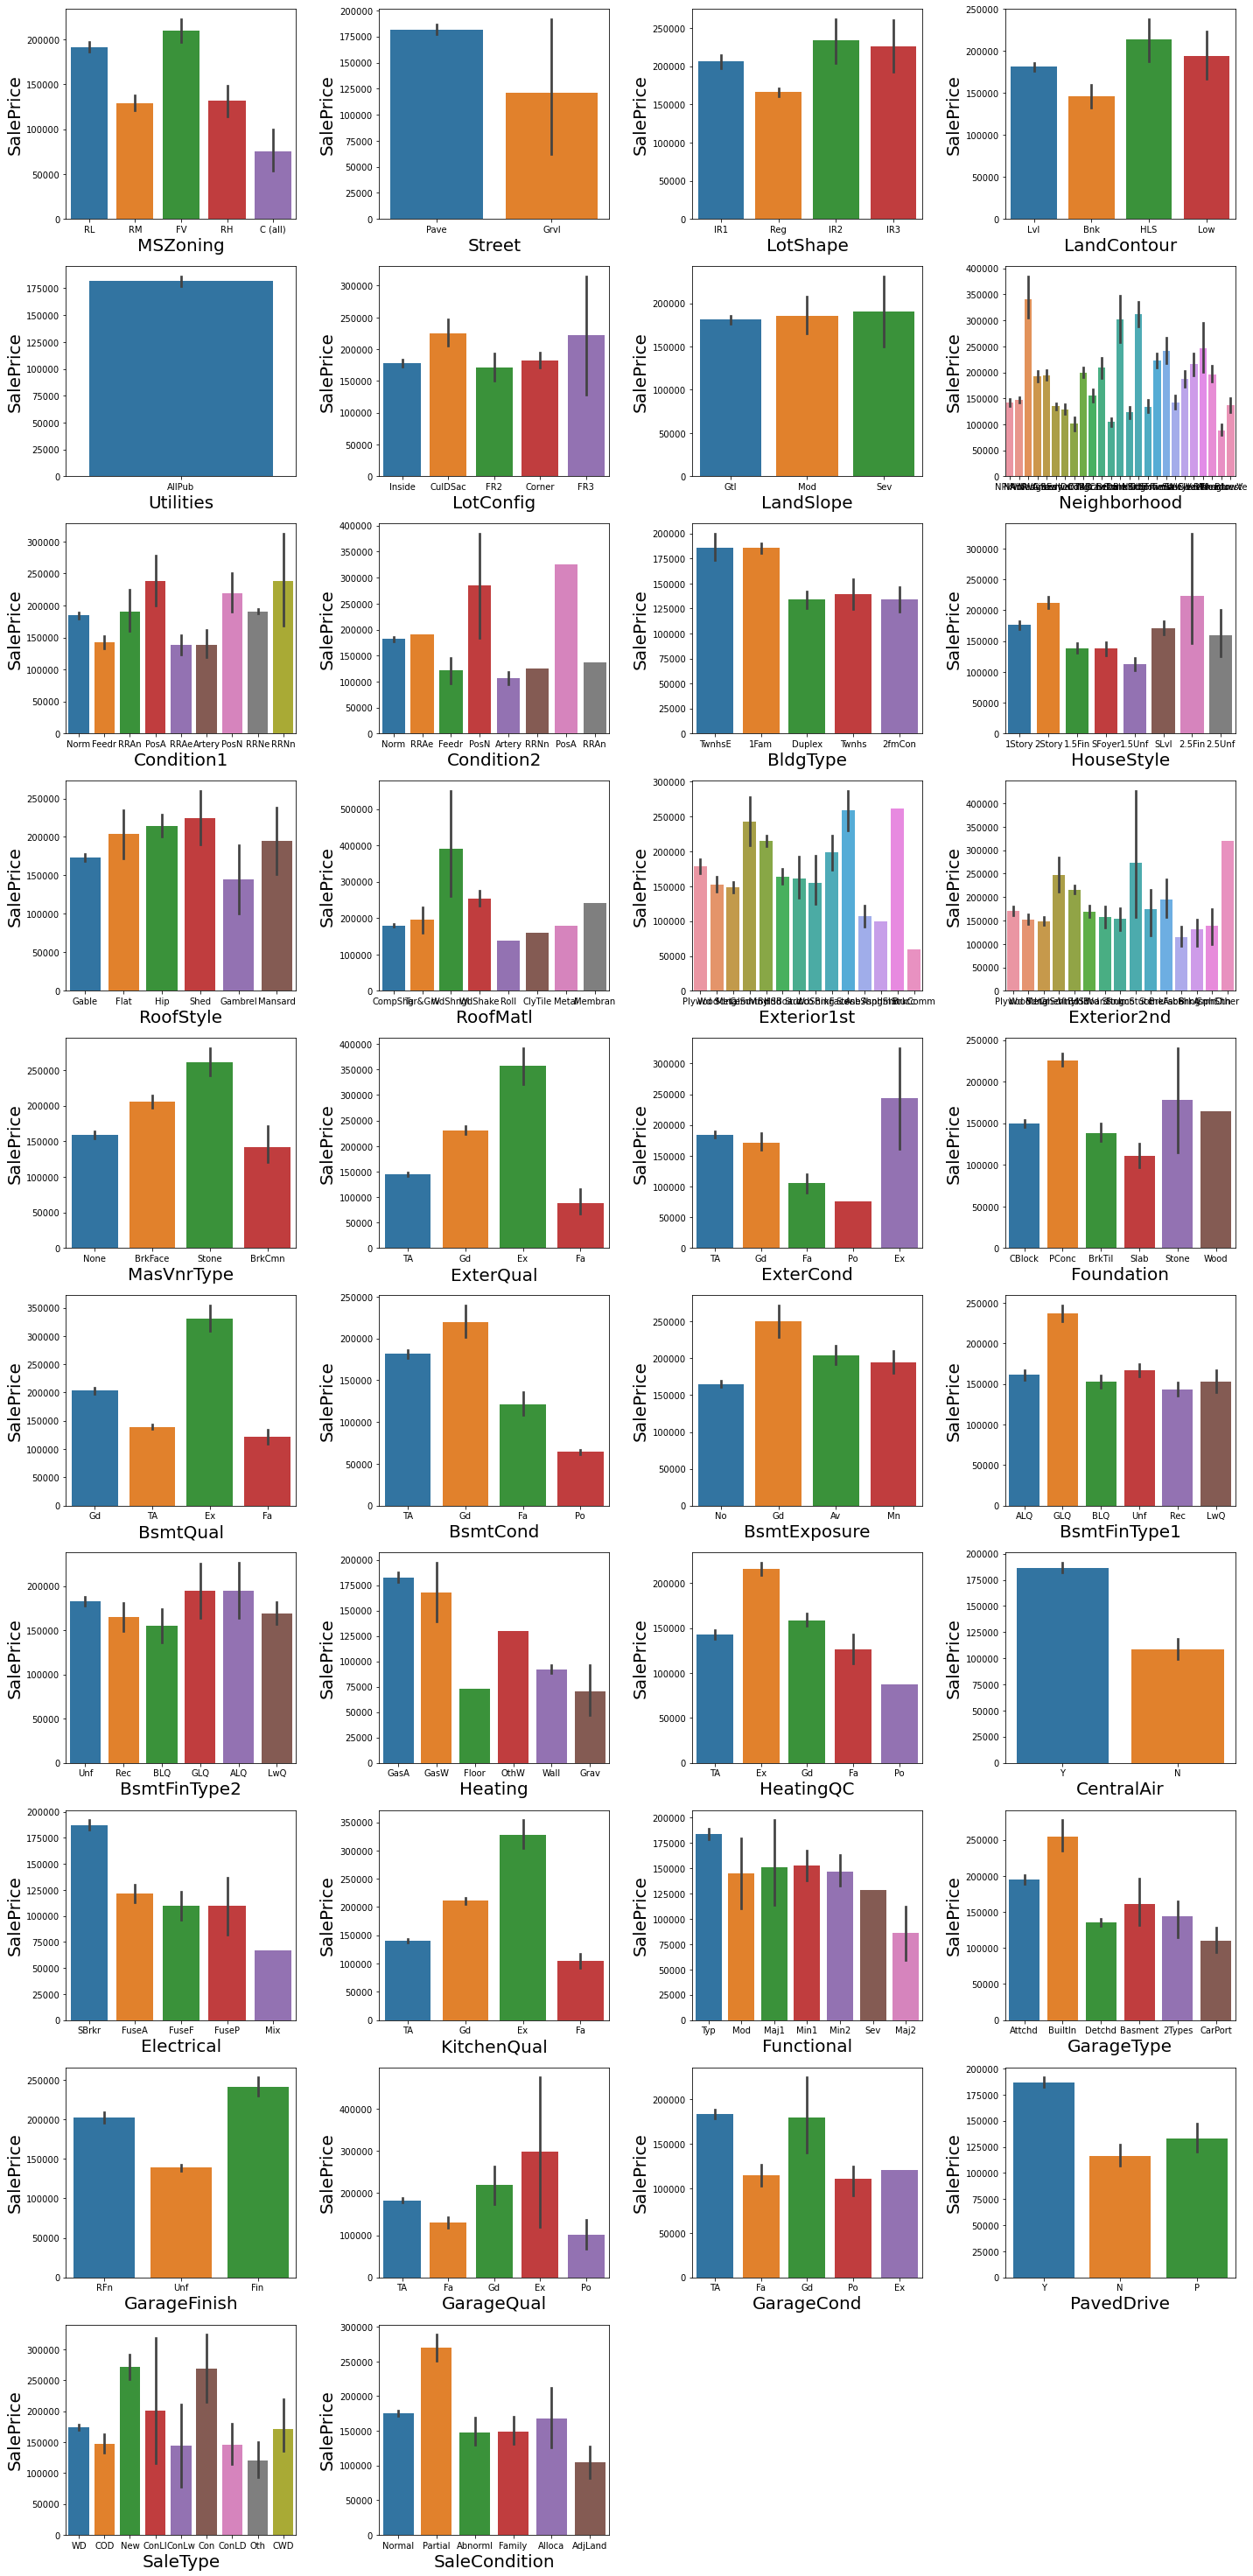

In [92]:
plt.figure(figsize=(20,41))
plotnum=1
y = Housing['SalePrice']
for col in Housing[Housing.columns[Housing.dtypes == 'object']]:
    if plotnum<=40:
        plt.subplot(10,4,plotnum)
        sns.barplot(Housing[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('SalePrice',fontsize=20)
    plotnum+=1
plt.tight_layout()

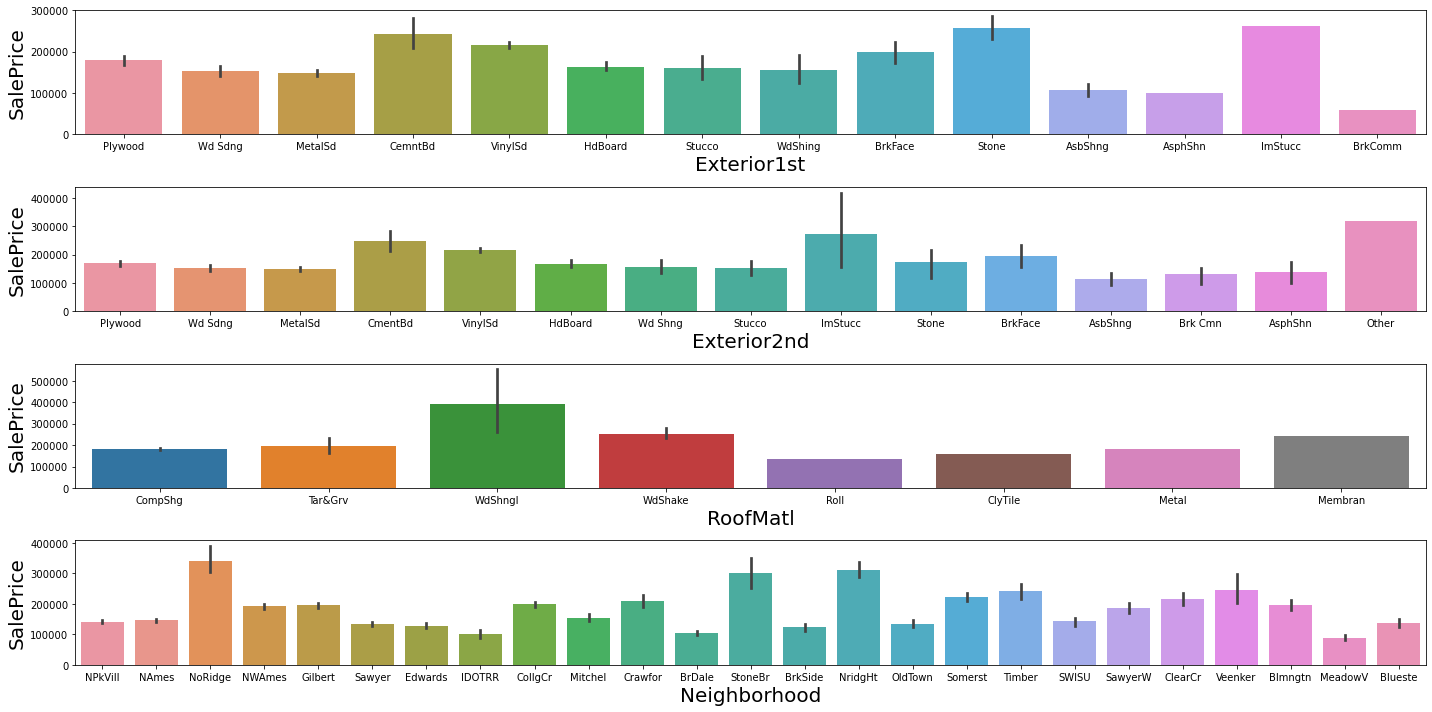

In [94]:
plt.figure(figsize=(20,10),facecolor='white')
plotnum=1
y = Housing['SalePrice']
for col in Housing[['Exterior1st','Exterior2nd','RoofMatl','Neighborhood']]:
    if plotnum<=4:
        plt.subplot(4,1,plotnum)
        sns.barplot(Housing[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('SalePrice',fontsize=20)
    plotnum+=1
plt.tight_layout()

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

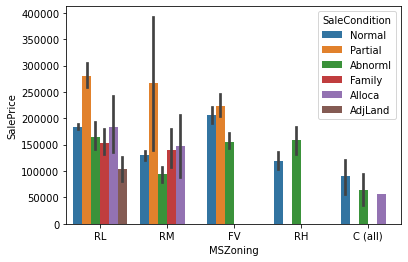

In [95]:
sns.barplot(Housing['MSZoning'],Housing['SalePrice'],hue = Housing['SaleCondition'])

New Homes are the most popular in all types of zoning

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

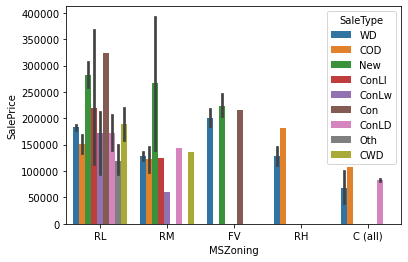

In [96]:
sns.barplot(Housing['MSZoning'],Housing['SalePrice'],hue = Housing['SaleType'])

New hourses and Low interest contract are the most popular sale types in low density, medium density and floating village residentials

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

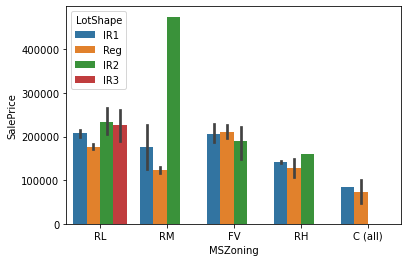

In [97]:
sns.barplot(Housing['MSZoning'],Housing['SalePrice'],hue = Housing['LotShape'])

Partially irregular and irregular plot shapes are most popular in low and medium residential zones

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

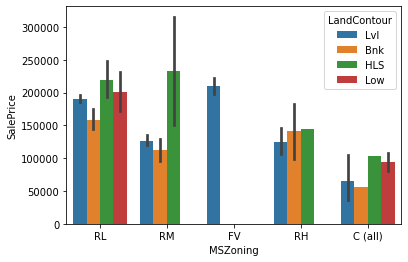

In [98]:
sns.barplot(Housing['MSZoning'],Housing['SalePrice'],hue = Housing['LandContour'])

Low density and medium density zones settled near hillsides and depressions are mostly sold at higher prices, whereas floating villages are settled in flat regions, and high density zones settle near banked regions sell for the highest prices

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

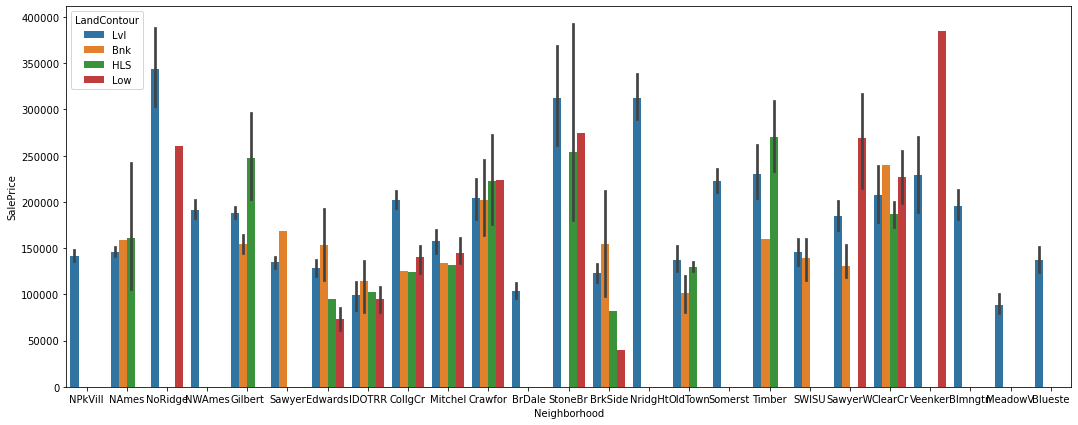

In [99]:
plt.figure(figsize=(18,7),facecolor='white')
sns.barplot(Housing['Neighborhood'],Housing['SalePrice'],hue = Housing['LandContour'])

Most housing properties established in levelled regions in North Ridge sell for the highest.

Most Housing properties in levelled regions of Stone Brook sell for highest followed by banked region and hillsides. 

Houses in levelled region of NorthRidge heights sell for the most while housing properties in depressed regions of Veenker sell for the highest prices. 

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

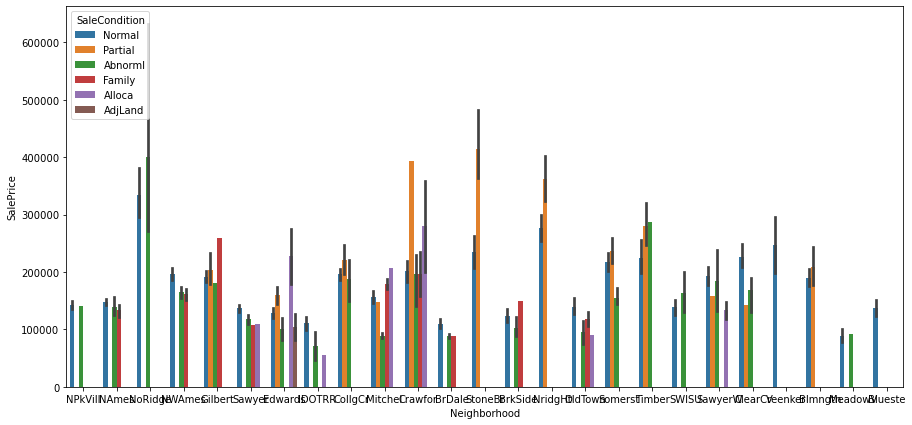

In [102]:
plt.figure(figsize=(15,7),facecolor='white')
sns.barplot(Housing['Neighborhood'],Housing['SalePrice'],hue = Housing['SaleCondition'])

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

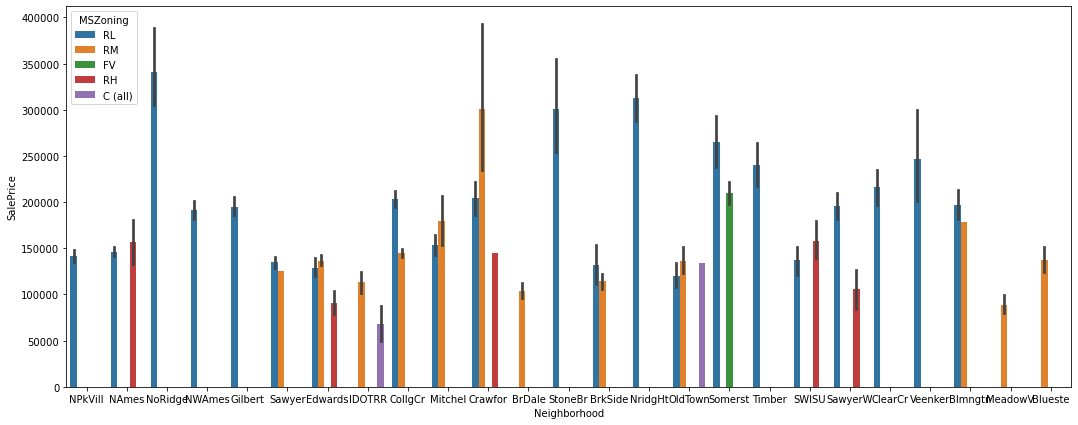

In [103]:
plt.figure(figsize=(18,7),facecolor='white')
sns.barplot(Housing['Neighborhood'],Housing['SalePrice'],hue = Housing['MSZoning'])

Most houses sold in North Ridge,North Ridge Heights, Somerset,TimberLane,Veenker, Bloomington Heights are in low density residential zones.

North Ames has more houses sold in High density residential zones, while Crawford has more houses sold in medium density residential zones.

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

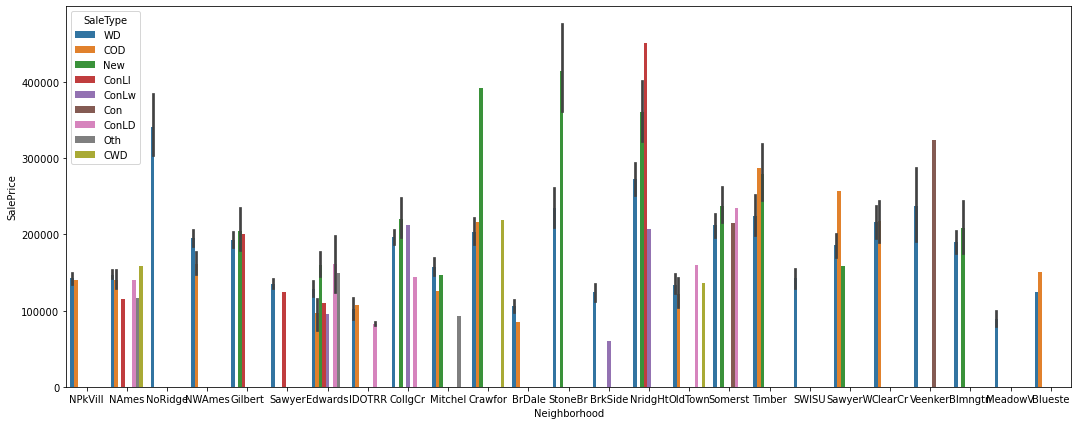

In [105]:
plt.figure(figsize=(18,7),facecolor='white')
sns.barplot(Housing['Neighborhood'],Housing['SalePrice'],hue = Housing['SaleType'])

Warranty Deed - Conventional,Home just constructed and sold,Contract Low InterestCourt Officer Deed/Estate are the most common sale types.

<AxesSubplot:xlabel='Heating', ylabel='SalePrice'>

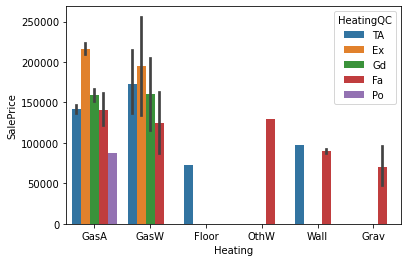

In [106]:
sns.barplot(Housing['Heating'],Housing['SalePrice'],hue = Housing['HeatingQC'])

Excelent quality of Gas forced warm air furnace and Gas hot water heating systems fetches the highest amount of money.

<AxesSubplot:xlabel='LotConfig', ylabel='SalePrice'>

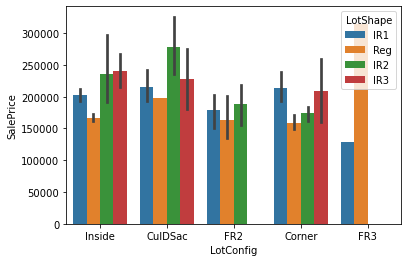

In [107]:
sns.barplot(Housing['LotConfig'],Housing['SalePrice'],hue = Housing['LotShape'])

3 sided Frontage properties with Regular plot shape sell for the highest

<AxesSubplot:xlabel='HouseStyle', ylabel='SalePrice'>

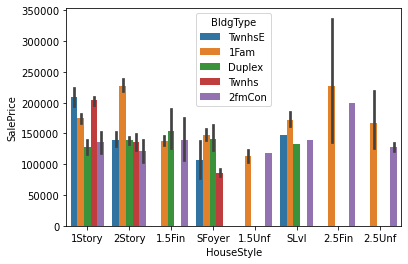

In [108]:
sns.barplot(Housing['HouseStyle'],Housing['SalePrice'],hue = Housing['BldgType'])

Two and one-half story: 2nd level finished housing properties sell for the highest.

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

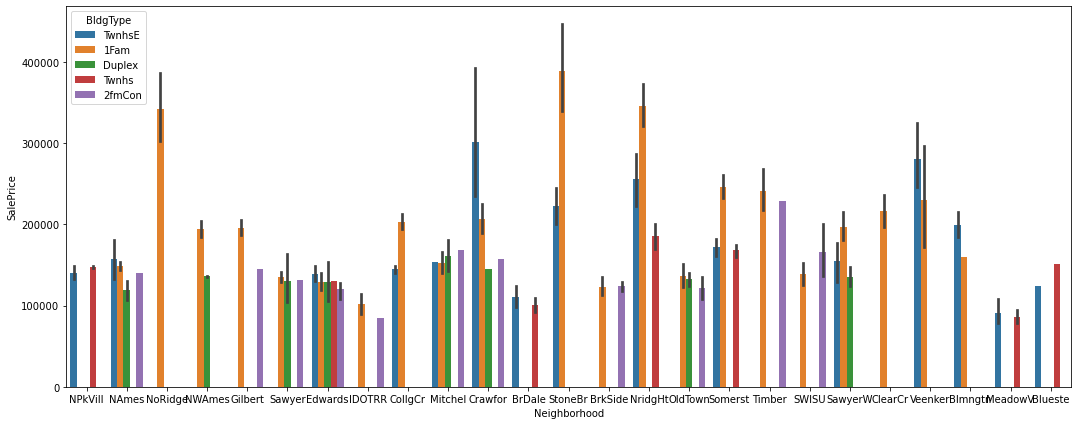

In [109]:
plt.figure(figsize=(18,7),facecolor='white')
sns.barplot(Housing['Neighborhood'],Housing['SalePrice'],hue = Housing['BldgType'])

Single-family Detached housing properties sell for the highest in most neighborhoods

Encoding Categorical Columns

Encoding using Label Encoder

In [110]:
from sklearn.preprocessing import LabelEncoder

In [111]:
labenc = LabelEncoder()

In [115]:
for col in Housing[Housing.columns[Housing.dtypes == 'object']]:
    Housing[col] = labenc.fit_transform(Housing[col])

In [116]:
Housing['YrSold'] = Housing.YrSold.map({2007:2,2009:4,2006:1, 2008: 3, 2010: 5}) # encoding years in YrSold Column

In [117]:
Housing['Utilities'] =Housing.Utilities.map({0:1})

In [118]:
Housing.dtypes[Housing.dtypes != 'object']

MSSubClass         int64
MSZoning           int32
LotFrontage      float64
LotArea            int64
Street             int32
LotShape           int32
LandContour        int32
Utilities          int64
LotConfig          int32
LandSlope          int32
Neighborhood       int32
Condition1         int32
Condition2         int32
BldgType           int32
HouseStyle         int32
OverallQual        int64
OverallCond        int64
RoofStyle          int32
RoofMatl           int32
Exterior1st        int32
Exterior2nd        int32
MasVnrType         int32
MasVnrArea       float64
ExterQual          int32
ExterCond          int32
Foundation         int32
BsmtQual           int32
BsmtCond           int32
BsmtExposure       int32
BsmtFinType1       int32
BsmtFinSF1         int64
BsmtFinType2       int32
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating            int32
HeatingQC          int32
CentralAir         int32
Electrical         int32
1stFlrSF           int64


In [119]:
from sklearn.preprocessing import LabelEncoder

In [120]:
labenc = LabelEncoder()

In [121]:
for col in Housing_test[Housing_test.columns[Housing_test.dtypes == 'object']]:
    Housing_test[col] = labenc.fit_transform(Housing_test[col])

In [122]:
Housing_test['YrSold'] = Housing_test.YrSold.map({2007:2,2009:4,2006:1, 2008: 3, 2010: 5}) # encoding years in YrSold Column

In [123]:
Housing_test['Utilities'] =Housing_test.Utilities.map({0:1})

In [124]:
Housing_test.dtypes[Housing_test.dtypes != 'object']

MSSubClass         int64
MSZoning           int32
LotFrontage      float64
LotArea            int64
Street             int32
LotShape           int32
LandContour        int32
Utilities        float64
LotConfig          int32
LandSlope          int32
Neighborhood       int32
Condition1         int32
Condition2         int32
BldgType           int32
HouseStyle         int32
OverallQual        int64
OverallCond        int64
RoofStyle          int32
RoofMatl           int32
Exterior1st        int32
Exterior2nd        int32
MasVnrType         int32
MasVnrArea       float64
ExterQual          int32
ExterCond          int32
Foundation         int32
BsmtQual           int32
BsmtCond           int32
BsmtExposure       int32
BsmtFinType1       int32
BsmtFinSF1         int64
BsmtFinType2       int32
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating            int32
HeatingQC          int32
CentralAir         int32
Electrical         int32
1stFlrSF           int64


Finding Correlation between Feature and Target columns

In [125]:
h_corr =Housing.corr()

In [126]:
h_corr

MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass       1.000000  0.007478    -0.336681 -0.124151 -0.035981   
MSZoning         0.007478  1.000000    -0.069661 -0.023328  0.140215   
LotFrontage     -0.336681 -0.069661     1.000000  0.299452 -0.035309   
LotArea         -0.124151 -0.023328     0.299452  1.000000 -0.263973   
Street          -0.035981  0.140215    -0.035309 -0.263973  1.000000   
LotShape         0.104485  0.053655    -0.144523 -0.189201 -0.012941   
LandContour     -0.021387  0.001175    -0.073451 -0.159038  0.105226   
Utilities             NaN       NaN          NaN       NaN       NaN   
LotConfig        0.076880 -0.027246    -0.192468 -0.152063  0.000153   
LandSlope       -0.014930 -0.023952     0.046051  0.395410 -0.141572   
Neighborhood     0.013918 -0.251833     0.065824  0.010707  0.001420   
Condition1      -0.042474 -0.025651    -0.025581  0.029520  0.002189   
Condition2      -0.044319  0.031959     0.011761  0.040096  0.001406   
BldgType         0.731815 -0.024776    -0.403220 -0.215345 -0.013606   
HouseStyle       0.381585 -0.110991     0.056321 -0.040637  0.016793   
OverallQual      0.070462 -0.134037     0.229218  0.107188  0.057140   
OverallCond     -0.056978  0.189553    -0.047573  0.017513  0.031082   
RoofStyle       -0.100641  0.000913     0.146222  0.038615 -0.006875   
RoofMatl        -0.032214  0.009719     0.082566  0.194142  0.007889   
Exterior1st     -0.090178 -0.012037     0.087727  0.048265  0.012482   
Exterior2nd     -0.120022  0.005548     0.110762  0.027328  0.014618   
MasVnrType      -0.013252 -0.033521    -0.034388 -0.005204  0.000822   
MasVnrArea       0.028215 -0.059170     0.188108  0.120192  0.024363   
ExterQual       -0.024133  0.184815    -0.169835 -0.057865  0.044509   
ExterCond        0.004186 -0.099269     0.044582  0.011438  0.017738   
Foundation       0.053951 -0.244844     0.090734 -0.021195  0.032701   
BsmtQual        -0.052242  0.123822    -0.176402 -0.075262 -0.031959   
BsmtCond        -0.013220  0.002336     0.043165  0.010165 -0.017190   
BsmtExposure    -0.068192  0.037414    -0.123896 -0.136900  0.065253   
BsmtFinType1     0.017515  0.021518    -0.031507 -0.053584 -0.006420   
BsmtFinSF1      -0.052236 -0.034161     0.228996  0.221851 -0.009066   
BsmtFinType2     0.040573 -0.031322    -0.007509 -0.084713  0.045208   
BsmtFinSF2      -0.062403  0.027055     0.002159  0.056656  0.003550   
BsmtUnfSF       -0.134170 -0.032638     0.113924  0.006600  0.024205   
TotalBsmtSF     -0.214042 -0.058896     0.356107  0.259733  0.016422   
Heating          0.047734  0.051188    -0.026622 -0.020394  0.006981   
HeatingQC       -0.001994  0.119852    -0.078262 -0.003337 -0.047968   
CentralAir      -0.113883 -0.015887     0.077404  0.051182  0.043024   
Electrical       0.045533 -0.079205     0.066868  0.050388  0.038720   
1stFlrSF        -0.227927 -0.033095     0.403436  0.312843  0.011486   
2ndFlrSF         0.300366 -0.048968     0.089675  0.059803  0.040957   
LowQualFinSF     0.053737  0.012098     0.007506 -0.001915  0.007352   
GrLivArea        0.086448 -0.064125     0.374251  0.281360  0.043322   
BsmtFullBath     0.004556 -0.007287     0.094046  0.142387 -0.036483   
BsmtHalfBath     0.008207  0.006345     0.001389  0.059282  0.013788   
FullBath         0.140807 -0.188837     0.171773  0.123197  0.033208   
HalfBath         0.168423 -0.121209     0.047816  0.007271  0.045146   
BedroomAbvGr    -0.013283 -0.001906     0.237199  0.117351  0.027587   
KitchenAbvGr     0.283506  0.026744    -0.002729 -0.013075  0.012304   
KitchenQual     -0.011378  0.111689    -0.174713 -0.064278 -0.012056   
TotRmsAbvGrd     0.051179 -0.031062     0.318771  0.184546  0.038259   
Functional       0.022913 -0.091684     0.039272 -0.033165 -0.015309   
Fireplaces      -0.035792  0.010658     0.230610  0.285983  0.010574   
GarageType       0.077469  0.125155    -0.216237 -0.123746 -0.000824   
GarageFinish    -0.000067  0.162566    -0.192961 -0.117

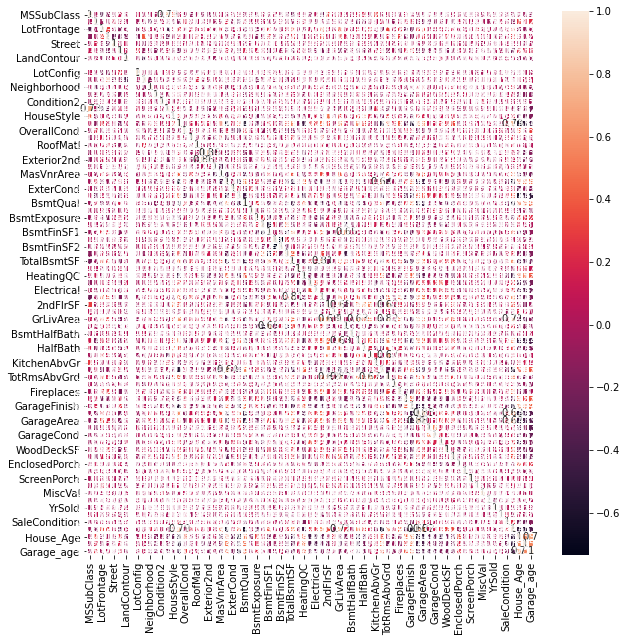

In [127]:
plt.figure(figsize=(10,10))
sns.heatmap(h_corr,annot=True,linewidth=1)
plt.show()

Visualizing correlation of feature columns with label column.

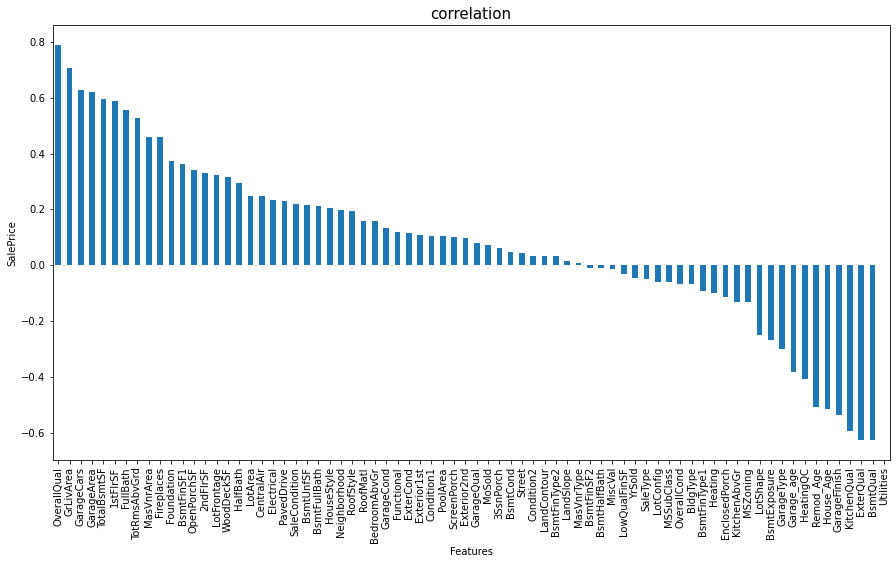

In [129]:
plt.figure(figsize = (15,8))
Housing.corr()['SalePrice'].sort_values(ascending = False).drop(['SalePrice']).plot(kind='bar')
plt.xlabel('Features',fontsize=10)
plt.ylabel('SalePrice',fontsize=10)
plt.title('correlation',fontsize = 15)
plt.show()

OverallQual,GrLiveArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,MasVnrArea,FirePlaces have the strongest positive correlation with SalePrice while BsmtQual,ExterQual,KitchenQual,GarageFinish,House_age,Remod_age,HeatingQC,Garage_age have the strongest negative correlation with SalePrice.

Dropping column 'Utilities' since it doesn't contribute to building a good model for predicting the target variable values.

In [130]:
Housing.drop(columns = ['Utilities'],inplace=True)

In [131]:
Housing_test.drop(columns = ['Utilities'],inplace=True)

Removing Outliers in continuous data type columns using Z score Method

In [132]:
df2 =Housing[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch']].copy() #making a copy of the continuous data type columns with outliers.

In [133]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)] #taking 3 as threshold value

In [134]:
df3.shape

(1006, 14)

In [135]:
df2.shape

(1168, 14)

##### Data loss %:

In [136]:
loss=(1168-1006)/1168 * 100
loss

13.86986301369863

13.86% data loss is not acceptable therefore outliers will not be removed.

Normalizing Data Distribution using PowerTransformer

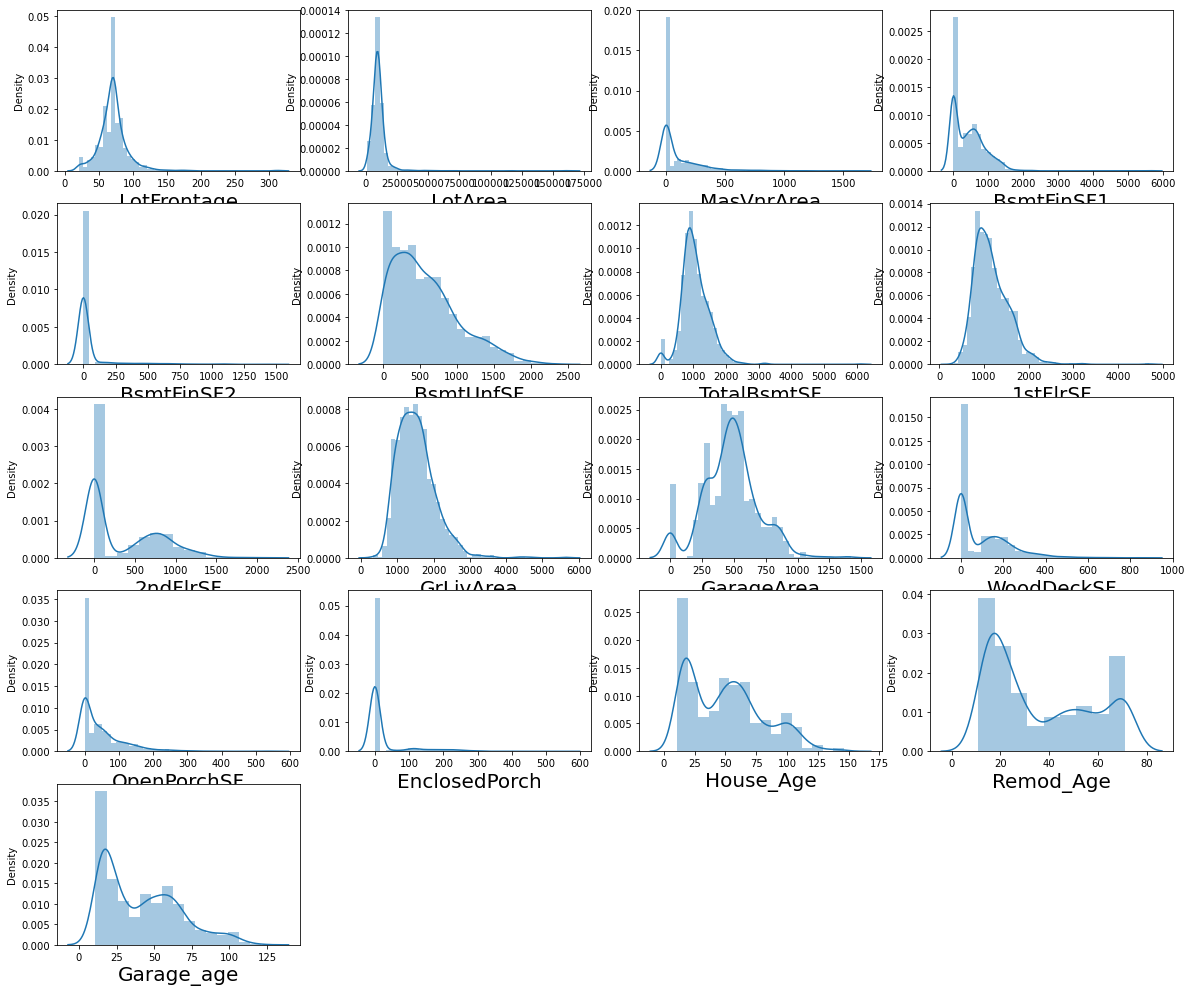

In [137]:
plt.figure(figsize=(20,35),facecolor='white')
plotnum=1
for col in Housing[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','House_Age','Remod_Age','Garage_age']]:
    if plotnum<=30:
        plt.subplot(10,4,plotnum)
        sns.distplot(Housing[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [138]:
Housing[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','House_Age','Remod_Age','Garage_age']].skew()

LotFrontage       2.710383
LotArea          10.659285
MasVnrArea        2.835718
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
GrLivArea         1.449952
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
House_Age         0.579204
Remod_Age         0.495864
Garage_age        0.708074
dtype: float64

Data Distributions are skewed.

In [139]:
from sklearn.preprocessing import PowerTransformer

In [140]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [141]:
df4 = Housing[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch']]

In [144]:
d1= powtrans.fit_transform(df4)

In [145]:
type(d1)

numpy.ndarray

In [146]:
d1 = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe


In [147]:
d1.skew()

LotFrontage      0.161368
LotArea          0.032509
MasVnrArea       0.439526
BsmtFinSF1      -0.404528
BsmtFinSF2       2.394737
BsmtUnfSF       -0.284390
TotalBsmtSF      0.286779
1stFlrSF        -0.002391
2ndFlrSF         0.280208
GrLivArea       -0.000054
GarageArea      -0.320370
WoodDeckSF       0.113026
OpenPorchSF     -0.002749
EnclosedPorch    2.022616
dtype: float64

In [149]:
d1.index = Housing.index

In [151]:
Housing[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch']] = d1[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch']]

In [152]:
Housing[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','House_Age','Remod_Age','Garage_age']].skew()

LotFrontage      0.161368
LotArea          0.032509
MasVnrArea       0.439526
BsmtFinSF1      -0.404528
BsmtFinSF2       2.394737
BsmtUnfSF       -0.284390
TotalBsmtSF      0.286779
1stFlrSF        -0.002391
2ndFlrSF         0.280208
GrLivArea       -0.000054
GarageArea      -0.320370
WoodDeckSF       0.113026
OpenPorchSF     -0.002749
EnclosedPorch    2.022616
House_Age        0.579204
Remod_Age        0.495864
Garage_age       0.708074
dtype: float64

A lot of skewness has been removed.

In [153]:
from sklearn.preprocessing import PowerTransformer

In [154]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [155]:
df4 = Housing_test[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch']]

In [156]:
transformed= powtrans.fit_transform(df4)

In [157]:
type(transformed)

numpy.ndarray

In [158]:
transformed = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe


In [159]:
transformed.skew()

LotFrontage      0.045579
LotArea          0.003111
MasVnrArea       0.376082
BsmtFinSF1      -0.441605
BsmtFinSF2       2.570199
BsmtUnfSF       -0.232099
TotalBsmtSF     -0.037982
1stFlrSF        -0.000548
2ndFlrSF         0.284246
GrLivArea       -0.000307
GarageArea      -0.361092
WoodDeckSF       0.210102
OpenPorchSF     -0.058951
EnclosedPorch    2.165535
dtype: float64

In [160]:
transformed.index = Housing_test.index

In [161]:
Housing_test[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch']] = transformed[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch']]

In [162]:
Housing_test[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','House_Age','Remod_Age','Garage_age']].skew()

LotFrontage      0.045579
LotArea          0.003111
MasVnrArea       0.376082
BsmtFinSF1      -0.441605
BsmtFinSF2       2.570199
BsmtUnfSF       -0.232099
TotalBsmtSF     -0.037982
1stFlrSF        -0.000548
2ndFlrSF         0.284246
GrLivArea       -0.000307
GarageArea      -0.361092
WoodDeckSF       0.210102
OpenPorchSF     -0.058951
EnclosedPorch    2.165535
House_Age        0.755233
Remod_Age        0.535600
Garage_age       0.742835
dtype: float64

### Feature Selection

In [163]:
from sklearn.preprocessing import StandardScaler

In [165]:
X = Housing.drop(columns = ['SalePrice'])
y = Housing['SalePrice']

In [166]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

### Checking for Multicollinearity using Variance Inflation Factor

In [167]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [168]:
vif = pd.DataFrame()

In [169]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [170]:
vif

Features        vif
0      MSSubClass   5.507317
1        MSZoning   1.382987
2     LotFrontage   2.174714
3         LotArea   2.900531
4          Street   1.131134
5        LotShape   1.294356
6     LandContour   1.329432
7       LotConfig   1.159877
8       LandSlope   1.481140
9    Neighborhood   1.279199
10     Condition1   1.159503
11     Condition2   1.122465
12       BldgType   5.184126
13     HouseStyle   2.467453
14    OverallQual   4.148229
15    OverallCond   1.959803
16      RoofStyle   1.299948
17       RoofMatl   1.203587
18    Exterior1st   4.362735
19    Exterior2nd   4.381901
20     MasVnrType   1.537917
21     MasVnrArea   1.973891
22      ExterQual   2.676707
23      ExterCond   1.220117
24     Foundation   2.130516
25       BsmtQual   2.321614
26       BsmtCond   1.192534
27   BsmtExposure   1.579126
28   BsmtFinType1   3.198546
29     BsmtFinSF1   6.770522
30   BsmtFinType2   4.019272
31     BsmtFinSF2   4.504940
32      BsmtUnfSF   5.323098
33    TotalBsmtSF   6.927810
34        Heating   1.317820
35      HeatingQC   1.696584
36     CentralAir   1.725971
37     Electrical   1.379424
38       1stFlrSF  17.623835
39       2ndFlrSF  17.357365
40   LowQualFinSF   1.532083
41      GrLivArea  28.469724
42   BsmtFullBath   2.322177
43   BsmtHalfBath   1.246433
44       FullBath   3.275114
45       HalfBath   2.467475
46   BedroomAbvGr   2.828754
47   KitchenAbvGr   1.855924
48    KitchenQual   2.068553
49   TotRmsAbvGrd   5.190507
50     Functional   1.253417
51     Fireplaces   1.720801
52     GarageType   1.792019
53   GarageFinish   2.089285
54     GarageCars   6.283705
55     GarageArea   6.196549
56     GarageQual   1.643079
57     GarageCond   1.576242
58     PavedDrive   1.541041
59     WoodDeckSF   1.360420
60    OpenPorchSF   1.612450
61  EnclosedPorch   1.419331
62      3SsnPorch   1.065638
63    ScreenPorch   1.160073
64       PoolArea   1.133082
65        MiscVal   1.087232
66         MoSold   1.089278
67         YrSold   1.101954
68       SaleType   1.121925
69  SaleCondition   1.199333
70      House_Age   8.061473
71      Remod_Age   2.933032
72     Garage_age   2.888644

BsmtFinSF1,1stFlrSF,2ndFlrSF,GrLivArea,GarageCars,GarageArea,House_Age exhibit high multicollinearity.

### Principle Component Analysis

In [171]:
from sklearn.decomposition import PCA

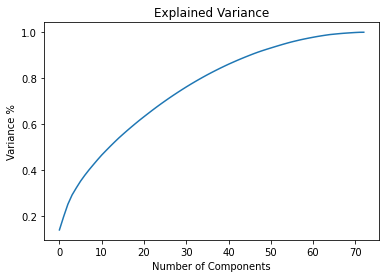

In [172]:
pca = PCA()
principleComponents = pca.fit_transform(scaled_X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

70 components explain around 95% variance in Data

### Selecting Kbest Features

In [173]:
from sklearn.feature_selection import SelectKBest, f_classif

In [174]:
bestfeat = SelectKBest(score_func = f_classif, k = 'all')
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [175]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(75,'Score'))

          Feature     Score
14    OverallQual  5.303071
65        MiscVal  3.564855
22      ExterQual  3.514221
41      GrLivArea  2.956955
25       BsmtQual  2.876879
48    KitchenQual  2.617125
54     GarageCars  2.578547
44       FullBath  2.435854
55     GarageArea  2.242545
53   GarageFinish  2.187163
70      House_Age  2.133300
33    TotalBsmtSF  2.070692
38       1stFlrSF  2.060541
4          Street  1.835751
71      Remod_Age  1.813783
34        Heating  1.707885
49   TotRmsAbvGrd  1.656866
1        MSZoning  1.640044
60    OpenPorchSF  1.613273
51     Fireplaces  1.591973
36     CentralAir  1.557680
72     Garage_age  1.535466
24     Foundation  1.528516
5        LotShape  1.407526
3         LotArea  1.405080
29     BsmtFinSF1  1.385210
35      HeatingQC  1.358939
45       HalfBath  1.337597
9    Neighborhood  1.281079
21     MasVnrArea  1.259874
59     WoodDeckSF  1.246439
27   BsmtExposure  1.214154
2     LotFrontage  1.212723
26       BsmtCond  1.190161
17       RoofMatl  1

In [179]:
X.shape

(1168, 73)

#### Selecting best features based on their scores:

In [176]:
x_best = X.drop(columns=['SaleType','Condition2','BsmtFinSF2']).copy()

In [177]:
scaled_x_best = scaler.fit_transform(x_best)

 This is a Regression Problem since Target/ Label column ('SalePrice') has Continuous type of Data.


## Regression Model Building

In [178]:
from sklearn.model_selection import train_test_split

In [179]:
from sklearn.metrics import r2_score

#### Finding the Best Random State

In [180]:
from sklearn.ensemble import RandomForestRegressor
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .25, random_state = i)
    modRF =  RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.919257069453985 on random_state: 72


In [181]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .25, random_state =72)

In [182]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR



In [183]:
from sklearn.metrics import r2_score,mean_squared_error

In [184]:
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
xg = XGBRegressor()
SV= SVR()
r=Ridge()

### Training the Models

In [186]:
rf.fit(x_train,y_train)
xg.fit(x_train,y_train)
SV.fit(x_train,y_train)
r.fit(x_train,y_train)
dt.fit(x_train,y_train)

DecisionTreeRegressor()

All models have been trained.

### Ridge Regression Model

In [187]:
y_r_pred = r.predict(x_test)

####  R2 Score

In [188]:
r2_score(y_test,y_r_pred)

0.8581092136367106

#### Mean Squared Error 

In [189]:
mean_squared_error(y_test,y_r_pred)

860008392.6691437

#### Root Mean Squared Error

In [190]:
np.sqrt(mean_squared_error(y_test,y_r_pred))

29325.899690702478

###  Random Forest Regression Model

In [191]:
y_rf_pred = rf.predict(x_test)

#### R2 Score

In [192]:
r2_score(y_test,y_rf_pred)

0.9120482095312854

#### Mean Squared Error

In [193]:
mean_squared_error(y_test,y_rf_pred)

533080969.46978563

#### Root Mean Squared Error

In [194]:
np.sqrt(mean_squared_error(y_test,y_rf_pred))

23088.546283163556

### XGB Regression Model 

In [195]:
y_xg_pred = xg.predict(x_test)

####  R2 Score

In [196]:
r2_score(y_test,y_xg_pred)

0.8990045700516924

#### Mean Squared Error

In [197]:
mean_squared_error(y_test,y_xg_pred)

612139234.7096407

#### Root Mean Squared Error

In [198]:
np.sqrt(mean_squared_error(y_test,y_xg_pred))

24741.447708443433

### Support Vector Regression Model

In [199]:
y_svr_pred = SV.predict(x_test)

####  R2 Score

In [200]:
r2_score(y_test,y_svr_pred)

-0.061666480005083235

#### Mean Squared Error

In [201]:
mean_squared_error(y_test,y_svr_pred)

6434822911.490364

#### Root Mean Squared Error

In [202]:
np.sqrt(mean_squared_error(y_test,y_svr_pred))

80217.34794600458

###  Decision Tree Regression Model

In [203]:
y_dt_pred = dt.predict(x_test)

####  R2 Score

In [204]:
r2_score(y_test,y_dt_pred)

0.7814180668358464

#### Mean Squared Error

In [205]:
mean_squared_error(y_test,y_dt_pred)

1324837939.2705479

#### Root Mean Squared Error

In [206]:
np.sqrt(mean_squared_error(y_test,y_dt_pred))

36398.32330301147

### Model Cross Validation

In [207]:
from sklearn.model_selection import ShuffleSplit,cross_val_score

#### Ridge Regression

In [208]:
cross_val_score(r,scaled_x_best,y,cv=5).mean()

0.7724187373088184

#### Random Forest Regression

In [209]:
cross_val_score(rf,scaled_x_best,y,cv=5).mean()

0.8456435803239344

#### XGB Regression

In [210]:
cross_val_score(xg,scaled_x_best,y,cv=5).mean()

0.8317857020177609

#### SV Regression

In [211]:
cross_val_score(SV,scaled_x_best,y,cv=5).mean()

-0.06178097265098006

#### Decision Tree Regression

In [212]:
cross_val_score(dt,scaled_x_best,y,cv=5).mean()

0.7110183393563956

 Based on comparing Accuracy Score results with Cross Validation results, it is determined that Random Forest Regressor is the best model. It also has the lowest Root Mean Squared Error score

#### Random Forest Regressor

In [270]:
parameter = {'n_estimators':[30,60,80],'max_depth': [10,20,40],'min_samples_leaf':[1,2,5,10,20,30],'min_samples_split':[5,10,20],'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}

In [ ]:
GridCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [ ]:
GridCV.fit(x_train,y_train)

In [ ]:
GridCV.best_params_

In [272]:
Best_mod = RandomForestRegressor(n_estimators = 80,criterion = 'mae', max_depth= 40, max_features = 'sqrt',min_samples_leaf = 1, min_samples_split = 5)


In [273]:
Best_mod.fit(x_train,y_train)


RandomForestRegressor(criterion='mae', max_depth=40, max_features='sqrt',
                      min_samples_split=5, n_estimators=80)

In [274]:
rfpred = Best_mod.predict(x_test)
acc = r2_score(y_test,rfpred)
print(acc*100)


91.11965879968058


##### Random Forest Regressor has an accuracy of 91.11%

#### Saving The Model

In [275]:
import joblib
joblib.dump(Best_mod,"BestModelPFA.pkl")

['BestModelPFA.pkl']

### Preparing the Test Dataset

In [276]:
xtest_best = Housing_test.drop(columns=['SaleType','Condition2','BsmtFinSF2']).copy()

In [277]:
scaled_xtest_best = scaler.fit_transform(xtest_best)

#### Loading The Model

In [278]:
mod=joblib.load("BestModelPFA.pkl")

In [279]:
print(mod.predict(scaled_xtest_best))

[330040.1625  202195.6125  266406.98125 162911.8375  240113.9375
  95645.925   146961.075   338239.5     242841.4625  169936.1875
  88305.875   146135.44375 124419.225   188765.6     304917.38125
 134110.4625  121342.70625 129545.825   174070.09375 196796.8875
 147878.9125  152391.5125  152872.1875  101890.7625  104341.55
 131843.175   181248.93125 143714.45    174560.125   113006.2125
 140039.8125  198454.675   237165.16875 162678.125   113544.2875
 175582.1875  196403.3375  121095.36875 159195.      145202.9125
 109291.075   318621.01875 212534.09375 185858.125   140853.3375
 129785.65    130406.60625 106236.09375 214795.925   341149.40625
 144127.225   221025.95    102481.6375   92892.2625  285166.30625
 131900.625   146669.8375  185155.68125 119541.3125  255706.5
 109226.56875 174778.5625  133829.8375  149993.5625  196422.8125
 115045.99375 160882.49375 211283.2375  136559.0625  165969.9375
 277419.39375 166698.34375 172037.08125 163932.7125  150876.79375
 226638.2125  308235.23125